In [1]:
import xarray as xr


stand_temp = xr.open_dataset("d:\World Bank\Paper - Child Mortality and Climate Shocks\Data\Data_proc\ERA5-Land_monthly_1970-2021.nc", chunks={})
stand_temp = stand_temp.rename({"t2m": "std_t"})

stand_mtemp = xr.open_dataset("d:\World Bank\Paper - Child Mortality and Climate Shocks\Data\Data_proc\ERA5-Land_monthly_1970-2021_stdmtemp.nc", chunks={})
stand_mtemp = stand_mtemp.rename({"t2m": "stdm_t"})

temperature = xr.open_dataset("d:\World Bank\Paper - Child Mortality and Climate Shocks\Data\Data_proc\ERA5-Land_monthly_1970-2021_stdtemp.nc", chunks={})
temperature = temperature.rename({"t2m": "t"})

temps = [temperature["t"], stand_temp["std_t"], stand_mtemp["stdm_t"]]


<>:4: SyntaxWarning: invalid escape sequence '\W'
<>:7: SyntaxWarning: invalid escape sequence '\W'
<>:10: SyntaxWarning: invalid escape sequence '\W'
<>:4: SyntaxWarning: invalid escape sequence '\W'
<>:7: SyntaxWarning: invalid escape sequence '\W'
<>:10: SyntaxWarning: invalid escape sequence '\W'
C:\Users\Nico\AppData\Local\Temp\ipykernel_5500\1871357339.py:4: SyntaxWarning: invalid escape sequence '\W'
  stand_temp = xr.open_dataset("d:\World Bank\Paper - Child Mortality and Climate Shocks\Data\Data_proc\ERA5-Land_monthly_1970-2021.nc", chunks={})
C:\Users\Nico\AppData\Local\Temp\ipykernel_5500\1871357339.py:7: SyntaxWarning: invalid escape sequence '\W'
  stand_mtemp = xr.open_dataset("d:\World Bank\Paper - Child Mortality and Climate Shocks\Data\Data_proc\ERA5-Land_monthly_1970-2021_stdmtemp.nc", chunks={})
C:\Users\Nico\AppData\Local\Temp\ipykernel_5500\1871357339.py:10: SyntaxWarning: invalid escape sequence '\W'
  temperature = xr.open_dataset("d:\World Bank\Paper - Child Mor

In [5]:
ds = xr.combine_by_coords(temps)

In [12]:
spis = spis[0]

In [17]:
unique_indices

array([   0,    1,    2, ..., 1800, 1801, 1802])

In [16]:
spis.lat

<xarray.DataArray 'lat' (lat: 1803)> Size: 7kB
array([-90. , -89.9, -89.8, ...,  89.8,  89.9,  90. ], dtype=float32)
Coordinates:
  * lat      (lat) float32 7kB -90.0 -89.9 -89.8 -89.7 ... 89.7 89.8 89.9 90.0

In [37]:
temps[0]

<xarray.DataArray 't' (time: 1224, lat: 1801, lon: 3600)> Size: 32GB
dask.array<open_dataset-t2m, shape=(1224, 1801, 3600), dtype=float32, chunksize=(95, 139, 277), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 29kB -179.9 -179.8 -179.7 ... 179.8 179.9 180.0
  * lat      (lat) float32 7kB -90.0 -89.9 -89.8 -89.7 ... 89.7 89.8 89.9 90.0
  * time     (time) datetime64[ns] 10kB 1970-01-01 1970-01-02 ... 2020-12-02

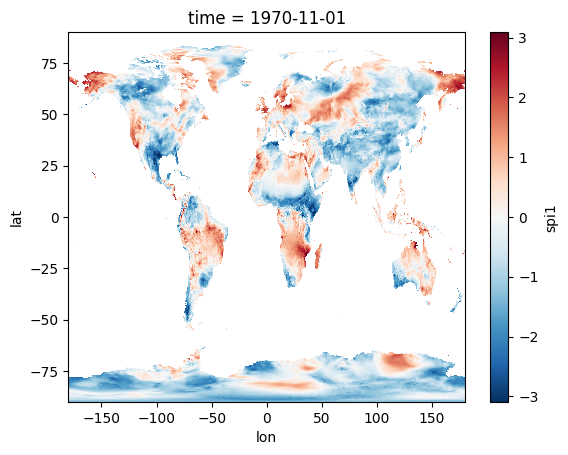

In [38]:
import numpy as np

def drop_duplicate_dims(ds):
    dims = list(ds.dims)
    for dim in dims:
        _, unique_indices = np.unique(ds[dim], return_index=True)

        # Select only the unique values along the x dimension
        ds = ds.isel({dim:unique_indices})
    return ds


drop_duplicate_dims(spis).isel(time=20).spi1.plot()

In [8]:
spis[0]

<xarray.Dataset> Size: 318GB
Dimensions:  (time: 1224, lat: 1803, lon: 3603)
Coordinates:
  * lat      (lat) float32 7kB -90.0 -89.9 -89.8 -89.7 ... 89.7 89.8 89.9 90.0
  * lon      (lon) float64 29kB -179.9 -179.8 -179.7 ... 179.8 179.9 180.0
  * time     (time) datetime64[ns] 10kB 1970-01-01 1970-01-02 ... 2020-12-02
Data variables:
    spi1     (time, lat, lon) float64 64GB ...
    spi3     (time, lat, lon) float64 64GB ...
    spi6     (time, lat, lon) float64 64GB ...
    spi9     (time, lat, lon) float64 64GB ...
    spi12    (time, lat, lon) float64 64GB ...

In [2]:
spis = [xr.open_dataset("D:\World Bank\Paper - Child Mortality and Climate Shocks\Data\Data_proc\ERA5-Land_monthly_1970-2021_spi.nc")]


<>:1: SyntaxWarning: invalid escape sequence '\W'
<>:1: SyntaxWarning: invalid escape sequence '\W'
C:\Users\Nico\AppData\Local\Temp\ipykernel_5500\2278750713.py:1: SyntaxWarning: invalid escape sequence '\W'
  spis = [xr.open_dataset("D:\World Bank\Paper - Child Mortality and Climate Shocks\Data\Data_proc\ERA5-Land_monthly_1970-2021_spi.nc")]


In [31]:
val_links

0        65680208
42       64275511
96       64341101
126      64275401
157      20142603
           ...   
11483    20070908
11499    67601106
11539    20090901
11556    20061206
11559    20080408
Name: link, Length: 480, dtype: int64

In [38]:
gdf = gpd.read_parquet("G:\Maestría\Tesis\Repo\data\data_in\ICPAG\icpag.parquet")

In [1]:
from dask.distributed import Client

client = Client()

2024-09-18 13:06:22,280 - distributed.semaphore - WARNING - Tried to release Lock or Semaphore but it was already released: name='D:\\World Bank\\Paper - Child Mortality and Climate Shocks\\Data\\Data_proc\\Climate_shocks_v6_comp.nc', lease_id='6f3a3dd8789a4c03ba8d9725b4ba616c'. This can happen if the Lock or Semaphore timed out before.
2024-09-18 13:10:55,068 - distributed.semaphore - WARNING - Tried to release Lock or Semaphore but it was already released: name='D:\\World Bank\\Paper - Child Mortality and Climate Shocks\\Data\\Data_proc\\Climate_shocks_v6_comp.nc', lease_id='f6508c4060934b7c8fbb943f9a960f49'. This can happen if the Lock or Semaphore timed out before.
2024-09-18 14:40:11,319 - distributed.semaphore - WARNING - Tried to release Lock or Semaphore but it was already released: name='D:\\World Bank\\Paper - Child Mortality and Climate Shocks\\Data\\Data_proc\\Climate_shocks_v6_comp.nc', lease_id='9dd972e7b9d44595b96ea7b717951add'. This can happen if the Lock or Semaphore t

In [2]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 4,Total memory: 31.88 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:52519,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 4
Started: Just now,Total memory: 31.88 GiB
Comm: tcp://127.0.0.1:52544,Total threads: 1
Dashboard: http://127.0.0.1:52545/status,Memory: 7.97 GiB
Nanny: tcp://127.0.0.1:52522,


In [7]:
import xarray as xr
import numpy as np

ds = xr.open_dataset(r"D:/World Bank/Paper - Child Mortality and Climate Shocks/Data/Data_proc/Climate_shocks_v6.nc", chunks={"lat":300, "lon":300, "time":-1})
ds.isel(lat=slice(0, -1)) # Remove last lat so its multiple of 600
ds = ds.drop("month")

ds = ds.sel(time=ds.time.dt.day == 1)
for coord in ["lat", "lon"]:
    ds[coord] = ds[coord].astype(np.float32)
    round_coords = ds[coord].pipe(lambda x: np.round(x, decimals=1))
    _, counts = np.unique(round_coords, return_counts=True)
    assert len(counts[counts > 1])==0
    ds[coord] = round_coords


# Reduce size
for var in ds.data_vars:
    ds[var] = ds[var].astype(np.float32)

encoding = {
    var: {"zlib": True, "complevel": 9} for var in ds.data_vars
}

# ds = ds.chunk({"lat":100, "lon":100, "time":12})
ds.to_netcdf(r"D:/World Bank/Paper - Child Mortality and Climate Shocks/Data/Data_proc/Climate_shocks_v6_comp.nc", encoding=encoding, engine="h5netcdf", mode='w')

C:\Users\Nico\AppData\Roaming\Python\Python312\site-packages\xarray\core\dataset.py:282: UserWarning: The specified chunks separate the stored chunks along dimension "lat" starting at index 300. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
C:\Users\Nico\AppData\Roaming\Python\Python312\site-packages\xarray\core\dataset.py:282: UserWarning: The specified chunks separate the stored chunks along dimension "lon" starting at index 300. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
C:\Users\Nico\AppData\Local\Temp\ipykernel_13004\1285520959.py:6: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  ds = ds.drop("month")


In [76]:
import os
import logging
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm  # for notebooks

tqdm.pandas()

pd.options.mode.chained_assignment = None  # default='warn'
logging.getLogger("distributed").setLevel(logging.WARNING)

# Set global variables
PROJECT = r"D:\World Bank\Paper - Child Mortality and Climate Shocks"
OUTPUTS = rf"{PROJECT}\Outputs"
DATA = rf"{PROJECT}\Data"
DATA_IN = rf"{DATA}\Data_in"
DATA_PROC = rf"{DATA}\Data_proc"
DATA_OUT = rf"{DATA}\Data_out"

### Load data #############
print("Loading data...")

### CLIMATE DATA
climate_data_temp = xr.open_dataset(rf"{DATA_PROC}/Climate_shocks_v6.nc", engine="h5netcdf")
climate_data_temp = climate_data_temp[["std_t", "stdm_t", "t"]]

climate_data_spi = xr.open_dataset(rf"{DATA_PROC}/Climate_shocks_v7_spi.nc")

### DHS DATA
full_dhs = pd.read_stata(rf"{DATA_IN}/DHS/DHSBirthsGlobalAnalysis_05142024.dta")
full_dhs["ID"] = full_dhs.index
df = full_dhs.copy()
print("Data loaded! Processing...")

###########################

climate_variables = [
    "spi1",
    "spi3",
    "spi6",
    "spi9",
    "spi12",
    "t",
    "std_t",
    "stdm_t",
]


def round_off(number):
    """Round a number to the closest 0.5.
    >>> round_off(1.3)
    1.5
    >>> round_off(2.6)
    2.5
    """

    return round(number + .4999) - .5

def compute_stats(ds_temp, ds_spi):

    vars = [v for v in ds_temp.data_vars] + [v for v in ds_spi.data_vars]
    arr_temp = ds_temp.to_array().values
    arr_spi = ds_spi.to_array().values
    arr = np.concatenate([arr_temp, arr_spi])

    inutero = arr[:, :9]
    born_1m = arr[:, 9:11]
    born_2to12m = arr[:, 11:22]

    assert inutero.shape[1] == 9  # 9 months in utero
    assert born_1m.shape[1] == 2
    # 1 month after birth (a little bit more because we dont have climate data for the exact day of birth. On average is one month)
    assert born_2to12m.shape[1] == 11  # next 11 months after birth

    # Compute stats using numpy for efficiency
    inutero = {
        f"{var}_inutero_avg": value
        for var, value in zip(vars, np.nanmean(inutero, axis=1))
    }
    born_1m = {
        f"{var}_30d_avg": value
        for var, value in zip(vars, np.nanmean(born_1m, axis=1))
    }
    born_2to12m = {
        f"{var}_2m12m_avg": value
        for var, value in zip(vars, np.nanmean(born_2to12m, axis=1))
    }

    results = {**inutero, **born_1m, **born_2to12m}
    results = pd.Series(results)
    return results

def get_climate_shock(from_date, to_date, lat, lon):
    if pd.isna(from_date):
        return np.nan

    # Filter point and time
    point_data_temp = climate_data_temp.sel(
        time=slice(from_date, to_date), lat=lat, lon=lon
    )

    point_data_spi = climate_data_spi.sel(
        time=slice(from_date, to_date), lat=round_off(lat), lon=round_off(lon)
    )

    out = compute_stats(point_data_temp, point_data_spi)

    return out

### Process dataframe ####
# Create datetime object from year and month
df["day"] = 1
df["month"] = df["chb_month"].astype(float)
df["year"] = df["chb_year"].astype(float)
df["birthdate"] = pd.to_datetime(df[["year", "month", "day"]]).to_numpy()

# Maximum range of dates
df["from_date"] = df["birthdate"] + pd.DateOffset(
    months=-9
)  # From in utero (9 months before birth)
df["to_date"] = df["birthdate"] + pd.DateOffset(
    months=13
)  # To the first year of life

# Filter children from_date greater than 1990 (we only have climate data from 1990)
df = df[df["from_date"] > "1990-01-01"]

# Filter children to_date smalle than 2021 (we only have climate data to 2020)
df = df[df["to_date"] < "2021-01-01"]

df["lat_round"] = df["LATNUM"].apply(lambda x: np.round(x, decimals=1))
df["lon_round"] = df["LONGNUM"].apply(lambda x: np.round(x, decimals=1))
df = df.reset_index(drop=True)

### Run process ####
coords_cols = ["lat_climate", "lon_climate"]
shock_cols = []

print("Assigning climate shocks to DHS data...")


Loading data...
Data loaded! Processing...
Assigning climate shocks to DHS data...


In [83]:
def get_climate_shock(from_date, to_date, lat, lon):
    if pd.isna(from_date):
        return np.nan

    # Filter point and time
    point_data_temp = climate_data_temp.sel(
        time=slice(from_date, to_date), lat=lat, lon=lon
    )

    point_data_spi = climate_data_spi.sel(
        time=slice(from_date, to_date), lat=round_off(lat), lon=round_off(lon)
    )

    return point_data_temp, point_data_spi
    out = compute_stats(point_data_temp, point_data_spi)

    return out


In [150]:
climate_data_spi

<xarray.Dataset> Size: 871MB
Dimensions:  (lat: 180, lon: 360, time: 480)
Coordinates:
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * time     (time) datetime64[ns] 4kB 1981-01-01 1981-02-01 ... 2020-12-01
Data variables:
    spi1     (time, lat, lon) float32 124MB dask.array<chunksize=(480, 100, 100), meta=np.ndarray>
    spi3     (time, lat, lon) float32 124MB dask.array<chunksize=(480, 100, 100), meta=np.ndarray>
    spi6     (time, lat, lon) float32 124MB dask.array<chunksize=(480, 100, 100), meta=np.ndarray>
    spi9     (time, lat, lon) float32 124MB dask.array<chunksize=(480, 100, 100), meta=np.ndarray>
    spi12    (time, lat, lon) float32 124MB dask.array<chunksize=(480, 100, 100), meta=np.ndarray>
    spi24    (time, lat, lon) float32 124MB dask.array<chunksize=(480, 100, 100), meta=np.ndarray>
    spi48    (time, lat, lon) float32 124MB dask.array<chunksize=(480, 100, 100), meta=np.ndarray>
Attributes: (12/27)
    Source_Software:            dbinterface.py, dbexport.py, netcdf_handling.py
    creator_name:               Carolina Arias Munoz
    Conventions:                CF-1.6
    _CoordSysBuilder:           ucar.nc2.dataset.conv.CF1Convention
    date_created:               2021-09-02
    01.title:                   Standardized Precipitation Index, 01-month ac...
    ...                         ...
    17.factsheet_url:           https://edo.jrc.ec.europa.eu/documents/factsh...
    18.jrc_data_catalogue_url:  http://data.europa.eu/89h/0a92348b-20c1-4689-...
    19.sample_url:              https://edo.jrc.ec.europa.eu/gdo/php/wms.php?...
    20.metadata_last_updated:   2021-07-06
    21.values_legend:           [Less than or equal to -2, -2 to -1.5, -1.5 t...
    22.version_notes:           Current version: Version 1.2.0 covers data fr...

In [152]:
climate_data_temp

<xarray.Dataset> Size: 48GB
Dimensions:  (time: 612, lat: 1801, lon: 3600)
Coordinates:
  * lat      (lat) float32 7kB -90.0 -89.9 -89.8 -89.7 ... 89.7 89.8 89.9 90.0
  * lon      (lon) float32 14kB -179.9 -179.8 -179.7 ... 179.8 179.9 180.0
  * time     (time) datetime64[ns] 5kB 1970-01-01 1970-02-01 ... 2020-12-01
Data variables:
    std_t    (time, lat, lon) float32 16GB ...
    stdm_t   (time, lat, lon) float32 16GB ...
    t        (time, lat, lon) float32 16GB ...

In [142]:
# climate_data_temp = xr.open_dataset(rf"{DATA_PROC}/Climate_shocks_v6.nc", engine="h5netcdf")
# climate_data_temp = climate_data_temp[["std_t", "stdm_t", "t"]]

climate_data_spi = xr.open_dataset(rf"{DATA_PROC}/Climate_shocks_v7_spi.nc", chunks={"lat":100, "lon":100, "time":-1})

C:\Users\Nico\AppData\Roaming\Python\Python312\site-packages\xarray\core\dataset.py:282: UserWarning: The specified chunks separate the stored chunks along dimension "lat" starting at index 100. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
C:\Users\Nico\AppData\Roaming\Python\Python312\site-packages\xarray\core\dataset.py:282: UserWarning: The specified chunks separate the stored chunks along dimension "lon" starting at index 100. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(


In [92]:
ds_spi.to_array()

<xarray.DataArray (variable: 7, time: 23)> Size: 644B
array([[ 0.248,  1.135,  0.084,  2.16 , -0.533,  1.77 , -0.878, -1.537,
        -1.243, -0.103,  1.075, -0.868, -0.269,  0.341,  0.084, -0.842,
        -0.218, -1.754, -0.48 , -1.144, -1.941, -1.197,  1.136],
       [-0.124,  0.335,  0.353,  1.358,  0.519,  1.885,  0.297, -0.777,
        -1.836, -1.366, -0.071,  0.171,  0.158, -0.969, -0.503, -1.111,
        -0.969, -1.744, -1.133, -1.511, -1.895, -2.302, -0.871],
       [ 0.416,  0.763,  0.343,  0.009,  0.366,  1.125,  0.637, -0.748,
        -1.179, -1.145, -0.464, -0.965, -0.817, -0.485, -0.038,  0.01 ,
        -1.094, -1.162, -1.531, -1.702, -2.188, -2.487, -1.489],
       [ 0.429,  0.397,  0.473,  0.49 ,  0.781,  0.653,  0.072, -0.279,
        -0.927, -0.994, -0.438, -0.626, -0.747, -0.744, -1.03 , -0.882,
        -0.551, -0.253, -0.477, -1.761, -2.153, -2.568, -1.542],
       [ 0.38 ,  0.448,  0.441,  0.534,  0.443,  0.734,  0.532,  0.389,
        -0.421, -0.902, -0.273, -0.547, -0.65 , -0.722, -0.723, -0.757,
        -0.749, -1.117, -1.206, -1.046, -1.237, -1.839, -1.773],
       [-0.765, -0.715, -0.711, -0.671, -0.688, -0.433, -0.639, -0.897,
        -1.043, -0.687, -0.125, -0.302, -0.187, -0.188, -0.19 , -0.198,
        -0.263, -0.28 , -0.463, -0.454, -1.166, -1.822, -1.449],
       [ 0.453,  0.492,  0.484,  0.501,  0.497,  0.551,  0.294,  0.194,
         0.114, -0.337,  0.026, -0.266, -0.571, -0.57 , -0.575, -0.606,
        -0.6  , -0.731, -0.804, -0.919, -1.184, -1.411, -1.52 ]],
      dtype=float32)
Coordinates:
    lat       float64 8B 25.5
    lon       float64 8B 90.5
  * time      (time) datetime64[ns] 184B 2007-10-01 2007-11-01 ... 2009-08-01
  * variable  (variable) object 56B 'spi1' 'spi3' 'spi6' ... 'spi24' 'spi48'
Attributes: (12/27)
    Source_Software:            dbinterface.py, dbexport.py, netcdf_handling.py
    creator_name:               Carolina Arias Munoz
    Conventions:                CF-1.6
    _CoordSysBuilder:           ucar.nc2.dataset.conv.CF1Convention
    date_created:               2021-09-02
    01.title:                   Standardized Precipitation Index, 01-month ac...
    ...                         ...
    17.factsheet_url:           https://edo.jrc.ec.europa.eu/documents/factsh...
    18.jrc_data_catalogue_url:  http://data.europa.eu/89h/0a92348b-20c1-4689-...
    19.sample_url:              https://edo.jrc.ec.europa.eu/gdo/php/wms.php?...
    20.metadata_last_updated:   2021-07-06
    21.values_legend:           [Less than or equal to -2, -2 to -1.5, -1.5 t...
    22.version_notes:           Current version: Version 1.2.0 covers data fr...

In [147]:
def compute_stats(ds_temp, ds_spi):
    # Initialize an empty dictionary to store results
    results = {}
    
    # Define the time slices
    inutero_slice = slice(0, 9)
    born_1m_slice = slice(9, 11)
    born_2to12m_slice = slice(11, 22)
    
    # # Process variables in ds_temp
    for var in ds_temp.data_vars:
        data = ds_temp[var].load()
        results[f"{var}_inutero_avg"] = data.isel(time=inutero_slice).mean().item()
        results[f"{var}_30d_avg"] = data.isel(time=born_1m_slice).mean().item()
        results[f"{var}_2m12m_avg"] = data.isel(time=born_2to12m_slice).mean().item()
    
    # Process variables in ds_spi
    for var in ds_spi.data_vars:
        data = ds_spi[var].load()
        results[f"{var}_inutero_avg"] = data.isel(time=inutero_slice).mean().item()
        results[f"{var}_30d_avg"] = data.isel(time=born_1m_slice).mean().item()
        results[f"{var}_2m12m_avg"] = data.isel(time=born_2to12m_slice).mean().item()
    
    # Convert results to pandas Series
    results_series = pd.Series(results)
    return results_series


In [129]:
ds_spi

<xarray.Dataset> Size: 844B
Dimensions:  (time: 23)
Coordinates:
    lat      float64 8B 23.5
    lon      float64 8B 84.5
  * time     (time) datetime64[ns] 184B 2007-11-01 2007-12-01 ... 2009-09-01
Data variables:
    spi1     (time) float32 92B ...
    spi3     (time) float32 92B ...
    spi6     (time) float32 92B ...
    spi9     (time) float32 92B ...
    spi12    (time) float32 92B ...
    spi24    (time) float32 92B ...
    spi48    (time) float32 92B ...
Attributes: (12/27)
    Source_Software:            dbinterface.py, dbexport.py, netcdf_handling.py
    creator_name:               Carolina Arias Munoz
    Conventions:                CF-1.6
    _CoordSysBuilder:           ucar.nc2.dataset.conv.CF1Convention
    date_created:               2021-09-02
    01.title:                   Standardized Precipitation Index, 01-month ac...
    ...                         ...
    17.factsheet_url:           https://edo.jrc.ec.europa.eu/documents/factsh...
    18.jrc_data_catalogue_url:  http://data.europa.eu/89h/0a92348b-20c1-4689-...
    19.sample_url:              https://edo.jrc.ec.europa.eu/gdo/php/wms.php?...
    20.metadata_last_updated:   2021-07-06
    21.values_legend:           [Less than or equal to -2, -2 to -1.5, -1.5 t...
    22.version_notes:           Current version: Version 1.2.0 covers data fr...

In [135]:
df = df.sort_values(["lat_round",	"lon_round"])

In [136]:
i = 0

In [149]:
%%timeit


s = df.sample(1)
ds_temp, ds_spi = get_climate_shock(
    s["from_date"].item(),
    s["to_date"].item(),
    s["lat_round"].item(),
    s["lon_round"].item(),
)

compute_stats(ds_temp, ds_spi)



536 ms ± 185 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [132]:
from line_profiler import LineProfiler

s = df.sample(1)
ds_temp, ds_spi = get_climate_shock(
    s["from_date"].item(),
    s["to_date"].item(),
    s["lat_round"].item(),
    s["lon_round"].item(),
)

lp = LineProfiler()
lp_wrapper = lp(compute_stats)
lp_wrapper(
    ds_temp, ds_spi
)
lp.print_stats()


Timer unit: 1e-07 s

Total time: 0.0940129 s
File: C:\Users\Nico\AppData\Local\Temp\ipykernel_14552\1381528832.py
Function: compute_stats at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def compute_stats(ds_temp, ds_spi):
     2                                               # Initialize an empty dictionary to store results
     3         1          5.0      5.0      0.0      results = {}
     4                                               
     5                                               # Define the time slices
     6         1         10.0     10.0      0.0      inutero_slice = slice(0, 9)
     7         1          5.0      5.0      0.0      born_1m_slice = slice(9, 11)
     8         1          4.0      4.0      0.0      born_2to12m_slice = slice(11, 22)
     9                                               
    10                                               # # Process variables in ds_temp
    11      

In [ ]:
climate_results = chunk.progress_apply(
    lambda s: get_climate_shock(
        s["from_date"],
        s["to_date"],
        s["lat_round"],
        s["lon_round"],
    ),
    axis=1,
)


In [ ]:
chunk_size = 100
for n in tqdm(range(0, df.index.max(), chunk_size)):

    file = rf"{DATA_PROC}/births_climate_{n}.parquet"
    if os.path.exists(file):
        print(f"{file} exists, moving to next iteration")
        continue

    chunk = df.loc[
        (df.index >= n) & (df.index < n + chunk_size),
        ["ID", "from_date", "to_date", "lat_round", "lon_round"],
    ].copy()

    climate_results = chunk.progress_apply(
        lambda s: get_climate_shock(
            s["from_date"],
            s["to_date"],
            s["lat_round"],
            s["lon_round"],
        ),
        axis=1,
    )

    # Save results into a df
    climate_results = climate_results.apply(pd.Series)
    climate_results["ID"] = chunk["ID"]
    climate_results["lat"] = chunk["lat_round"]
    climate_results["lon"] = chunk["lon_round"]
    climate_results.to_parquet(file, index=False)

In [1]:
PROJECT = r"D:\World Bank\Paper - Child Mortality and Climate Shocks"
OUTPUTS = rf"{PROJECT}\Outputs"
DATA = rf"{PROJECT}\Data"
DATA_IN = rf"{DATA}\Data_in"
DATA_PROC = rf"{DATA}\Data_proc"
DATA_OUT = rf"{DATA}\Data_out"

import xarray as xr
import pandas as pd
import numpy as np

climate_data = xr.open_dataset(rf"{DATA_PROC}/Climate_shocks_v6.nc", engine="h5netcdf")
print(climate_data)
stop
dates = climate_data.time.values


full_dhs = pd.read_stata(rf"{DATA_IN}/DHS/DHSBirthsGlobalAnalysis_05142024.dta")
full_dhs["ID"] = full_dhs.index
df = full_dhs.copy()
print("Data loaded! Processing...")

###########################

climate_variables = [
    "spi1",
    "spi3",
    "spi6",
    "spi9",
    "spi12",
    "t",
    "std_t",
    "stdm_t",
]

def compute_stats(ds):

    arr = ds.to_array().values
    inutero = arr[:, :9]
    born_1m = arr[:, 9:11]
    born_2to12m = arr[:, 11:22]

    assert inutero.shape[1] == 9  # 9 months in utero
    assert born_1m.shape[1] == 2
    # 1 month after birth (a little bit more because we dont have climate data for the exact day of birth. On average is one month)
    assert born_2to12m.shape[1] == 11  # next 11 months after birth

    # Compute stats using numpy for efficiency
    inutero = {
        f"{var}_inutero_avg": value
        for var, value in zip(ds.data_vars, np.nanmean(inutero, axis=1))
    }
    born_1m = {
        f"{var}_30d_avg": value
        for var, value in zip(ds.data_vars, np.nanmean(born_1m, axis=1))
    }
    born_2to12m = {
        f"{var}_2m12m_avg": value
        for var, value in zip(ds.data_vars, np.nanmean(born_2to12m, axis=1))
    }

    results = {**inutero, **born_1m, **born_2to12m}
    results = pd.Series(results)
    return results

def get_climate_shock(from_date, to_date, lat, lon):
    if pd.isna(from_date):
        return np.nan

    # Filter point
    # climate_data_vars = climate_data[climate_variables]
    point_data = climate_data.sel(time=slice(from_date, to_date)).sel(
        lat=lat, lon=lon
    )

    # Get position of original data
    lat = point_data.lat.item()
    lon = point_data.lon.item()

    # Filter by time
    inutero_to_1st_year = point_data.isel(time=slice(0, 22))
    out = compute_stats(inutero_to_1st_year)
    # Agregar columnas acá...
    return out

### Process dataframe ####
# Create datetime object from year and month
df["day"] = 1
df["month"] = df["chb_month"].astype(float)
df["year"] = df["chb_year"].astype(float)
df["birthdate"] = pd.to_datetime(df[["year", "month", "day"]]).to_numpy()

# Maximum range of dates
df["from_date"] = df["birthdate"] + pd.DateOffset(
    months=-9
)  # From in utero (9 months before birth)
df["to_date"] = df["birthdate"] + pd.DateOffset(
    months=13
)  # To the first year of life

# Filter children from_date greater than 1990 (we only have climate data from 1990)
df = df[df["from_date"] > "1990-01-01"]

# Filter children to_date smalle than 2021 (we only have climate data to 2020)
df = df[df["to_date"] < "2021-01-01"]

df["lat_round"] = df["LATNUM"].apply(lambda x: np.round(x, decimals=1))
df["lon_round"] = df["LONGNUM"].apply(lambda x: np.round(x, decimals=1))
df = df.reset_index(drop=True)

### Run process ####
coords_cols = ["lat_climate", "lon_climate"]
shock_cols = []


<xarray.Dataset> Size: 127GB
Dimensions:  (time: 612, lat: 1801, lon: 3600)
Coordinates:
  * lat      (lat) float32 7kB -90.0 -89.9 -89.8 -89.7 ... 89.7 89.8 89.9 90.0
  * lon      (lon) float32 14kB -179.9 -179.8 -179.7 ... 179.8 179.9 180.0
  * time     (time) datetime64[ns] 5kB 1970-01-01 1970-02-01 ... 2020-12-01
Data variables:
    spi1     (time, lat, lon) float32 16GB ...
    spi3     (time, lat, lon) float32 16GB ...
    spi6     (time, lat, lon) float32 16GB ...
    spi9     (time, lat, lon) float32 16GB ...
    spi12    (time, lat, lon) float32 16GB ...
    std_t    (time, lat, lon) float32 16GB ...
    stdm_t   (time, lat, lon) float32 16GB ...
    t        (time, lat, lon) float32 16GB ...


NameError: name 'stop' is not defined

In [8]:
climate_data.rio.set_spatial_dims("lon", "lat", inplace=True)
climate_data

<xarray.Dataset> Size: 127GB
Dimensions:  (time: 612, lat: 1801, lon: 3600)
Coordinates:
  * lat      (lat) float32 7kB -90.0 -89.9 -89.8 -89.7 ... 89.7 89.8 89.9 90.0
  * lon      (lon) float32 14kB -179.9 -179.8 -179.7 ... 179.8 179.9 180.0
  * time     (time) datetime64[ns] 5kB 1970-01-01 1970-02-01 ... 2020-12-01
Data variables:
    spi1     (time, lat, lon) float32 16GB ...
    spi3     (time, lat, lon) float32 16GB ...
    spi6     (time, lat, lon) float32 16GB ...
    spi9     (time, lat, lon) float32 16GB ...
    spi12    (time, lat, lon) float32 16GB ...
    std_t    (time, lat, lon) float32 16GB ...
    stdm_t   (time, lat, lon) float32 16GB ...
    t        (time, lat, lon) float32 16GB ...

In [13]:
climate_data

<xarray.Dataset> Size: 127GB
Dimensions:  (time: 612, y: 1801, x: 3600)
Coordinates:
  * y        (y) float32 7kB -90.0 -89.9 -89.8 -89.7 ... 89.7 89.8 89.9 90.0
  * x        (x) float32 14kB -179.9 -179.8 -179.7 -179.6 ... 179.8 179.9 180.0
  * time     (time) datetime64[ns] 5kB 1970-01-01 1970-02-01 ... 2020-12-01
Data variables:
    spi1     (time, y, x) float32 16GB ...
    spi3     (time, y, x) float32 16GB ...
    spi6     (time, y, x) float32 16GB ...
    spi9     (time, y, x) float32 16GB ...
    spi12    (time, y, x) float32 16GB ...
    std_t    (time, y, x) float32 16GB ...
    stdm_t   (time, y, x) float32 16GB ...
    t        (time, y, x) float32 16GB ...

In [12]:
climate_data = climate_data.rename({"lat":"y","lon":"x"})
climate_data

ValueError: cannot rename 'lat' because it is not a variable or dimension in this dataset

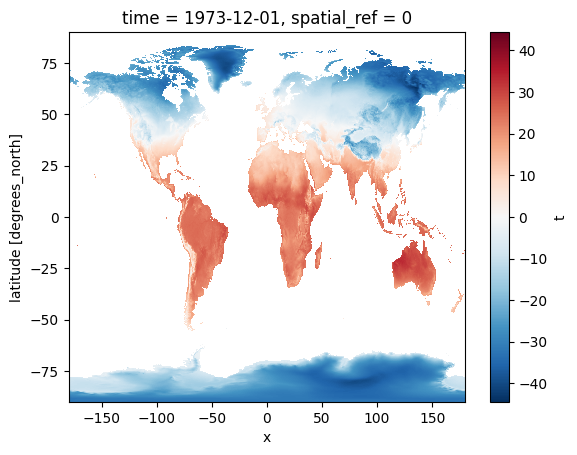

In [51]:
climate_data = climate_data.rio.write_crs("epsg:4326")
climate_data.t.isel(time=47).plot()

In [50]:
ds = xr.open_dataset(r"C:\Users\Nico\Downloads\spg01_m_wld_19810101_19811201_m.nc")
ds

<xarray.Dataset> Size: 3MB
Dimensions:  (time: 12, lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * time     (time) datetime64[ns] 96B 1981-01-01 1981-02-01 ... 1981-12-01
Data variables:
    spg01    (time, lat, lon) float32 3MB ...
    4326     float32 4B ...
Attributes: (12/27)
    Source_Software:            dbinterface.py, dbexport.py, netcdf_handling.py
    creator_name:               Carolina Arias Munoz
    Conventions:                CF-1.6
    _CoordSysBuilder:           ucar.nc2.dataset.conv.CF1Convention
    date_created:               2021-09-02
    01.title:                   Standardized Precipitation Index, 01-month ac...
    ...                         ...
    17.factsheet_url:           https://edo.jrc.ec.europa.eu/documents/factsh...
    18.jrc_data_catalogue_url:  http://data.europa.eu/89h/0a92348b-20c1-4689-...
    19.sample_url:              https://edo.jrc.ec.europa.eu/gdo/php/wms.php?...
    20.metadata_last_updated:   2021-07-06
    21.values_legend:           [Less than or equal to -2, -2 to -1.5, -1.5 t...
    22.version_notes:           Current version: Version 1.2.0 covers data fr...

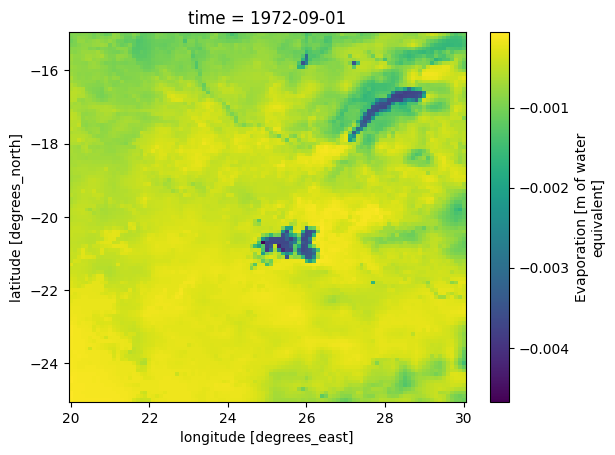

In [30]:
era5data = xr.open_dataset(r"D:\Datasets\ERA5 Reanalysis\monthly-land\data_1972.nc")
era5data.sel(longitude=slice(20, 30), latitude=slice(-15, -25)).isel(time=16).e.plot()

20.4 42.2


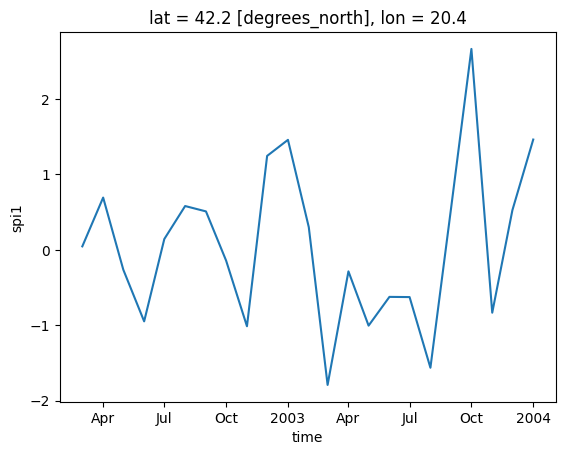

In [66]:
i = 817

lat = df.iloc[i].lat_round
lon = df.iloc[i].lon_round
from_dt = df.iloc[i].from_date
to_dt =   df.iloc[i].to_date
print(lon, lat)

climate_data.sel(lat=lat, lon=lon, time=slice(from_dt, to_dt)).spi1.plot()

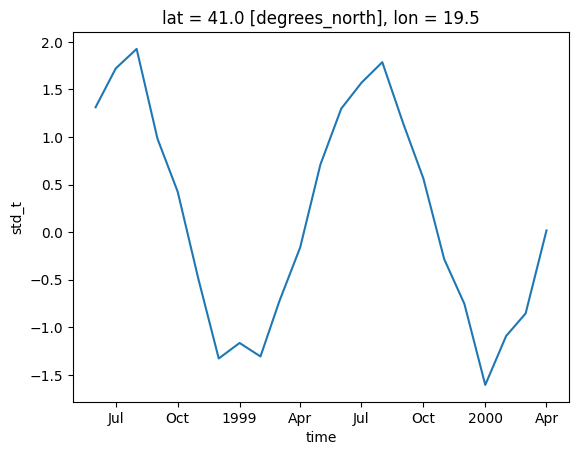

In [7]:
ds.lon

<xarray.DataArray 'lon' (lon: 3600)> Size: 14kB
array([-179.9, -179.8, -179.7, ...,  179.8,  179.9,  180. ], dtype=float32)
Coordinates:
  * lon      (lon) float32 14kB -179.9 -179.8 -179.7 ... 179.8 179.9 180.0

In [5]:
import pandas as pd

def compute_stats(ds):

    arr = ds.to_array().values
    inutero = arr[:, :9]
    born_1m = arr[:, 9:11]
    born_2to12m = arr[:, 11:22]

    assert inutero.shape[1] == 9  # 9 months in utero
    assert born_1m.shape[1] == 2
    # 1 month after birth (a little bit more because we dont have climate data for the exact day of birth. On average is one month)
    assert born_2to12m.shape[1] == 11  # next 11 months after birth

    # Compute stats using numpy for efficiency
    inutero = {
        f"{var}_inutero_avg": value
        for var, value in zip(ds.data_vars, np.nanmean(inutero, axis=1))
    }
    born_1m = {
        f"{var}_30d_avg": value
        for var, value in zip(ds.data_vars, np.nanmean(born_1m, axis=1))
    }
    born_2to12m = {
        f"{var}_2m12m_avg": value
        for var, value in zip(ds.data_vars, np.nanmean(born_2to12m, axis=1))
    }

    results = {**inutero, **born_1m, **born_2to12m}
    results = pd.Series(results)
    return results

def get_climate_shock(from_date, to_date, lat, lon):
    if pd.isna(from_date):
        return np.nan

    # Filter point
    # climate_data_vars = climate_data[climate_variables]
    point_data = ds.sel(time=slice(from_date, to_date)).sel(
        lat=lat, lon=lon
    )

    # Get position of original data
    lat = point_data.lat.item()
    lon = point_data.lon.item()

    # Filter by time
    inutero_to_1st_year = point_data.isel(time=slice(0, 22))
    out = compute_stats(inutero_to_1st_year)
    # Agregar columnas acá...
    return out


# full_dhs = pd.read_stata(rf"D:\World Bank\Paper - Child Mortality and Climate Shocks\Data\Data_in\DHS/DHSBirthsGlobalAnalysis_05142024.dta")
# full_dhs

In [9]:
import numpy as np

In [234]:
df = full_dhs
### Process dataframe ####
# Create datetime object from year and month
df["day"] = 1
df["month"] = df["chb_month"].astype(float)
df["year"] = df["chb_year"].astype(float)
df["birthdate"] = pd.to_datetime(df[["year", "month", "day"]]).to_numpy()

# Maximum range of dates
df["from_date"] = df["birthdate"] + pd.DateOffset(
    months=-8 #### CAMBIO
)  # From in utero (9 months before birth)
df["to_date"] = df["birthdate"] + pd.DateOffset(
    months=13
)  # To the first year of life

# Filter children from_date greater than 1990 (we only have climate data from 1990)
df = df[df["from_date"] > "1990-01-01"]

# Filter children to_date smalle than 2021 (we only have climate data to 2020)
df = df[df["to_date"] < "2021-01-01"]

In [227]:
df["lat_round"] = df["LATNUM"].apply(lambda x: np.round(x, decimals=1))
df["lon_round"] = df["LONGNUM"].apply(lambda x: np.round(x, decimals=1))
df = df.reset_index(drop=True)


In [250]:
import profile

In [253]:
from line_profiler import LineProfiler

def compute_stats(ds):
    # Define time slices using slice objects for clarity
    inutero_slice = slice(0, 9)
    born_1m_slice = slice(9, 11)
    born_2to12m_slice = slice(11, 22)

    # Compute means directly using xarray's optimized methods
    inutero_mean = ds.isel(time=inutero_slice).mean(dim='time')
    born_1m_mean = ds.isel(time=born_1m_slice).mean(dim='time')
    born_2to12m_mean = ds.isel(time=born_2to12m_slice).mean(dim='time')

    # Build the results dictionary
    results = {}
    for var in ds.data_vars:
        results[f"{var}_inutero_avg"] = inutero_mean[var].item()
        results[f"{var}_30d_avg"] = born_1m_mean[var].item()
        results[f"{var}_2m12m_avg"] = born_2to12m_mean[var].item()

    return pd.Series(results)

def get_climate_shock(ds, from_date, to_date, lat, lon):
    if pd.isna(from_date):
        return np.nan

    # Select the point data efficiently using xarray's selection methods
    point_data = ds.sel(time=slice(from_date, to_date), lat=lat, lon=lon)

    # Check if there is sufficient data
    if point_data.time.size < 22:
        return np.nan  # or handle this case as appropriate
    return point_data

    out = compute_stats(point_data)
    return out




In [270]:
s = df.sample(1)
point_data = get_climate_shock(ds,
        s["from_date"].item(),
        s["to_date"].item(),
        s["lat_round"].item(),
        s["lon_round"].item(),)


In [271]:

data_vars = list(point_data.data_vars)

# Convert all variables into a single NumPy array: shape (variables, time)
data_array = np.stack([point_data[var].values for var in data_vars])

# Define time indices
inutero_indices = slice(0, 9)

# Compute means over specified time slices
inutero_mean = data_array[:, inutero_indices].mean(axis=1)

# Compute means directly using xarray's optimized methods
# inutero_mean = point_data.isel(time=inutero_slice).mean(dim='time')


In [272]:
inutero_mean

array([ 0.47249513,  0.40726994,  0.06891055, -0.09899405, -0.50027833,
        0.45669516,  0.51021874, 26.26730347])

In [254]:
lp = LineProfiler()
s = df.sample(1)
point_data = get_climate_shock(ds,
        s["from_date"].item(),
        s["to_date"].item(),
        s["lat_round"].item(),
        s["lon_round"].item(),)
lp_wrapper = lp(compute_stats)
lp_wrapper(point_data)
lp.print_stats()


Timer unit: 1e-07 s

Total time: 0.876443 s
File: C:\Users\Nico\AppData\Local\Temp\ipykernel_15432\1544090344.py
Function: compute_stats at line 3

Line #      Hits         Time  Per Hit   % Time  Line Contents
     3                                           def compute_stats(ds):
     4                                               # Define time slices using slice objects for clarity
     5         1         11.0     11.0      0.0      inutero_slice = slice(0, 9)
     6         1          6.0      6.0      0.0      born_1m_slice = slice(9, 11)
     7         1          4.0      4.0      0.0      born_2to12m_slice = slice(11, 22)
     8                                           
     9                                               # Compute means directly using xarray's optimized methods
    10         1    8379761.0    8e+06     95.6      inutero_mean = ds.isel(time=inutero_slice).mean(dim='time')
    11         1     192020.0 192020.0      2.2      born_1m_mean = ds.isel(time=born_1

In [92]:
era5 = xr.open_dataset(r"D:\World Bank\Paper - Child Mortality and Climate Shocks\Data\Data_proc\ERA5-Land_monthly_1970-2021.nc")

In [91]:
b.isel(time=1).stdm_t.item()

-1.3032104969024658

In [71]:
b.isel(time=1).spi1.item()

-0.5229370456435194

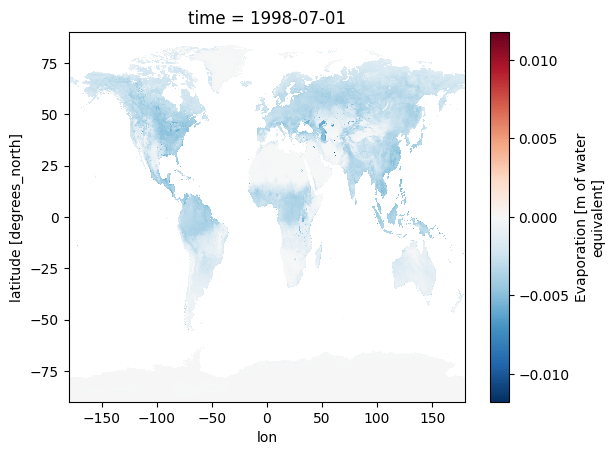

In [120]:
era5.isel(time=684).e.plot()

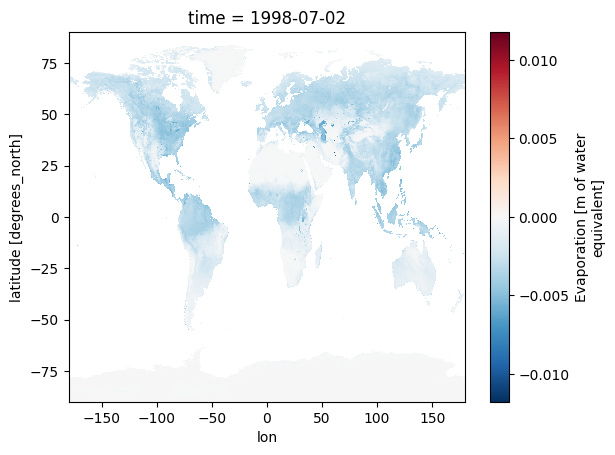

In [119]:
era5.isel(time=685).e.plot()

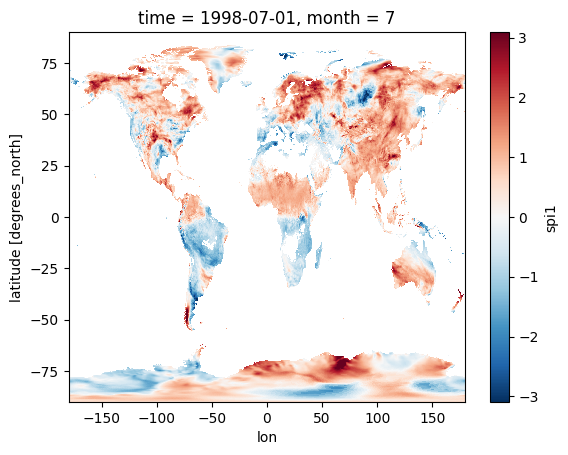

In [106]:
# ds = ds.sel(time=ds.time.dt.day == 1)
ds.isel(time=342).spi1.plot()

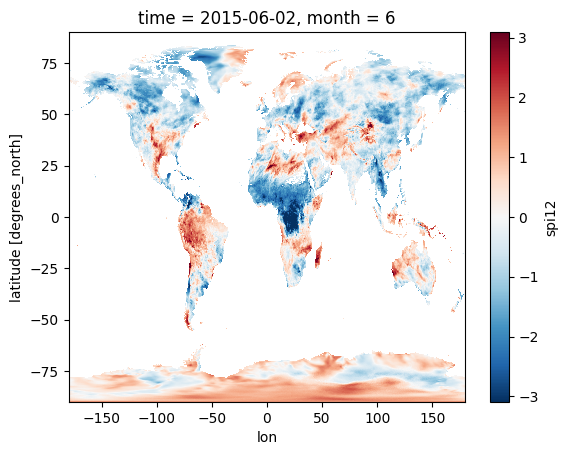

In [127]:
ds.isel(time=1091).spi12.plot()

In [38]:
%%timeit

s = df.sample(1)

get_climate_shock(
        ds,
        s["from_date"].item(),
        s["to_date"].item(),
        s["lat_round"].item(),
        s["lon_round"].item(),
    )


847 ms ± 131 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [35]:
%%timeit

s = df.sample(1)

get_climate_shock(
        s["from_date"].item(),
        s["to_date"].item(),
        s["lat_round"].item(),
        s["lon_round"].item(),
    ),


TypeError: get_climate_shock() missing 1 required positional argument: 'lon'

In [63]:

import numpy as np

def round_coord(dataset):
    return dataset.map(lambda a: np.round(a, decimals=2))

round_lons = ds.lon.pipe(lambda x: np.round(x, decimals=2))
_, counts = np.unique(round_lons, return_counts=True)
assert len(counts[counts > 1])==0

In [81]:

import pandas as pd
pd.Series(ds.lat.values).apply(lambda x: np.round(x, decimals=1))

0      -90.0
1      -89.9
2      -89.8
3      -89.7
4      -89.6
        ... 
1796    89.6
1797    89.7
1798    89.8
1799    89.9
1800    90.0
Length: 1801, dtype: float64

c:\Users\ofici\AppData\Local\Programs\Python\Python311\Lib\site-packages\xarray\backends\plugins.py:139: RuntimeWarning: 'ee' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


<Axes: title={'center': 'band = 1, spatial_ref = 0'}, xlabel='x', ylabel='y'>

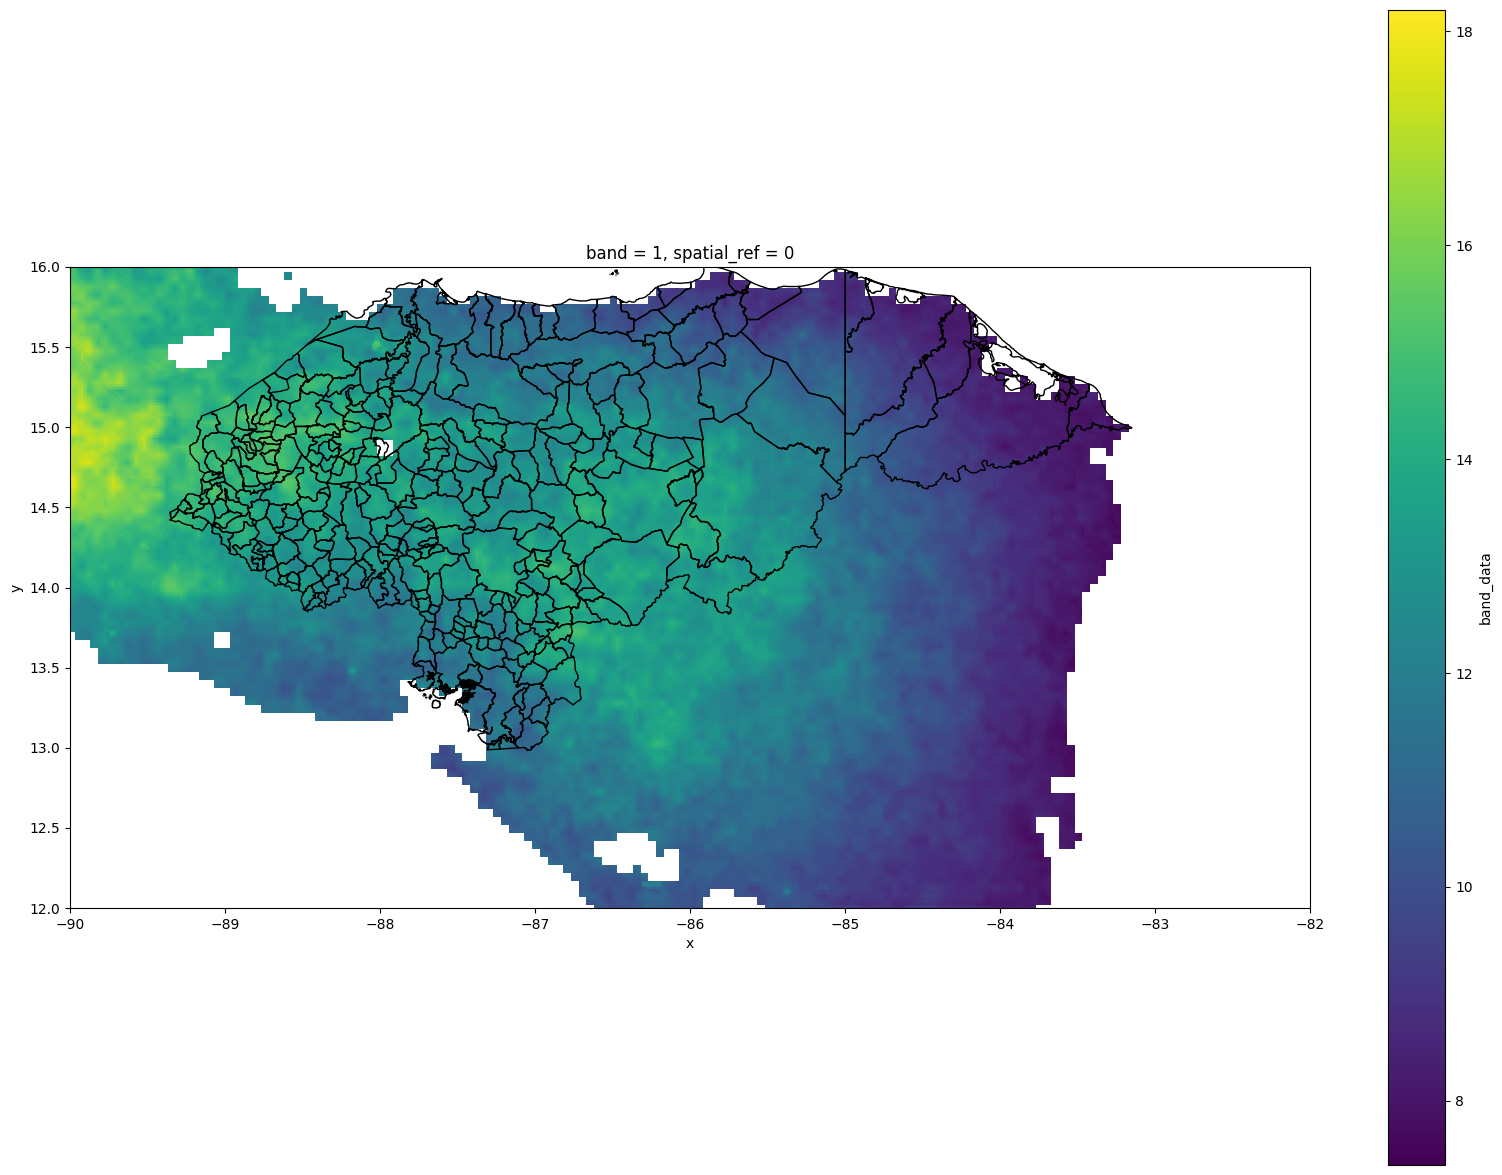

In [101]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(20,15))

ds = xr.open_dataset(r"D:\Downloads\sdei-global-annual-gwr-pm2-5-modis-misr-seawifs-aod-v4-gl-03-2001-geotiff\sdei-global-annual-gwr-pm2-5-modis-misr-seawifs-aod-v4-gl-03-2001.tif")#.plot()
ds = ds.sel(band=1)

# Select honduras
ds = ds.sel(x=slice(-90, -82), y=slice(16, 12))
ds.band_data.plot(ax=ax)


gdf.plot(facecolor='none', edgecolor='black', ax=ax)

In [114]:
import numpy as np
import xarray as xr
import pandas as pd
import geopandas as gpd

def assign_contamination_to_point(point):

    point_data = ds.sel(x=point.x, y=point.y, method="nearest")
    contamination = point_data.band_data.item()

    return contamination

# Honduras municipality shapefile
gdf = gpd.read_file(r"D:\Downloads\municipios\710ebc5a-2d41-4d60-851e-84663c2f72df.zip")
gdf = gdf.to_crs("EPSG:4326")

# Worldwide PM 2.5 data
data_a = r"D:\Downloads\sdei-global-annual-gwr-pm2-5-modis-misr-seawifs-aod-v4-gl-03-2013-geotiff\sdei-global-annual-gwr-pm2-5-modis-misr-seawifs-aod-v4-gl-03-2013.tif"
data_b = r"D:\Downloads\sdei-global-annual-gwr-pm2-5-modis-misr-seawifs-aod-v4-gl-03-2001-geotiff\sdei-global-annual-gwr-pm2-5-modis-misr-seawifs-aod-v4-gl-03-2001.tif"
datasets = [data_a, data_b]

for path in datasets:
    ds = xr.open_dataset(path)
    ds = ds.sel(x=slice(-90, -82), y=slice(16, 12), band=1)

    gdf["pm2_5"] = gdf.centroid.apply(assign_contamination_to_point)
    
    columns = ["ogc_fid", "nombre", "cod_muni", "pm2_5"]
    gdf[columns + ["geometry"]].to_file(path.replace(".tif", ".shp"))
    gdf[columns].to_stata(path.replace(".tif", ".dta"))

c:\Users\ofici\AppData\Local\Programs\Python\Python311\Lib\site-packages\xarray\backends\plugins.py:139: RuntimeWarning: 'ee' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
C:\Users\ofici\AppData\Local\Temp\ipykernel_7056\3663532284.py:26: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["pm2_5"] = gdf.centroid.apply(assign_contamination_to_point)
c:\Users\ofici\AppData\Local\Programs\Python\Python311\Lib\site-packages\xarray\backends\plugins.py:139: RuntimeWarning: 'ee' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
C:\Users\ofici\AppData\Local\Temp\ipykernel_7056\3663532284.py:26: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


In [112]:
gdf

,ogc_fid,nombre,cod_muni,superf_ha,geometry,pm2_5
0,1,La Ceiba,0101,65489.38,"POLYGON ((-86.68256 15.78810, -86.68129 15.788...",14.600000
1,2,Esparta,0103,46079.07,"POLYGON ((-87.19904 15.66086, -87.19906 15.660...",15.500000
2,3,Jutiapa,0104,53276.79,"POLYGON ((-86.37048 15.67635, -86.37016 15.676...",13.900000
3,4,La Masica,0105,46881.03,"POLYGON ((-87.13329 15.76275, -87.13330 15.762...",16.100000
4,5,San Francisco,0106,28249.63,"POLYGON ((-87.06409 15.62770, -87.06410 15.627...",14.300000
...,...,...,...,...,...,...
293,294,RamÃ³n Villeda Morales,0905,62008.18,"POLYGON ((-83.42609 15.26960, -83.42503 15.269...",8.200000
294,295,Wampusirpi,0906,177988.31,"POLYGON ((-84.63342 15.18236, -84.63388 15.182...",10.700000
295,296,Nueva Frontera,1628,15162.10,"POLYGON ((-88.68241 15.34026, -88.65968 15.319...",19.700001
296,297,Victoria,1810,79185.25,"POLYGON ((-87.46044 14.94139, -87.46045 14.941...",17.500000


In [105]:
gdf["pm2.5"] = gdf.centroid.apply(assign_contamination_to_point)



C:\Users\ofici\AppData\Local\Temp\ipykernel_7056\2164019322.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["pm2.5"] = gdf.centroid.apply(assign_contamination_to_point)


<Axes: >

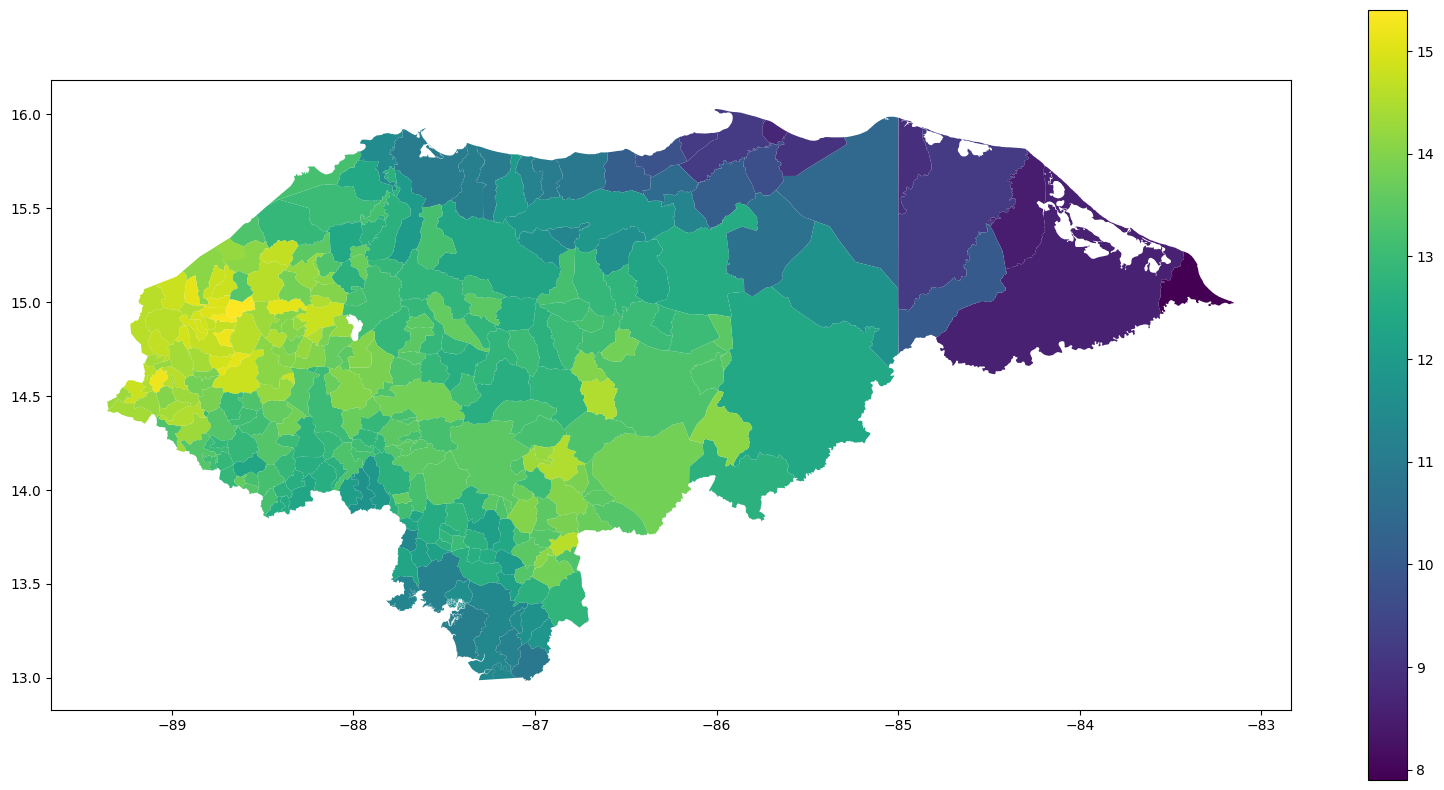

In [110]:
gdf.plot(column="pm2.5", legend=True, figsize=(20,10))

In [46]:
from math import sqrt
sqrt(gdf.AREA.mean())

301.962519613522

In [34]:
import geopandas as gpd
import pandas as pd

df = pd.read_csv(r"G:\Maestría\Tesis\Repo\data\data_out\models_by_epoch\effnet_v2S_lr0.0001_size128_y2013-2018-2022_stack1-4\effnet_v2S_lr0.0001_size128_y2013-2018-2022_stack1-4_val_149.csv")
val_links = df.link.drop_duplicates()

gdf = gpd.read_parquet(r"G:\Maestría\Tesis\Repo\data\data_in\ICPAG\icpag.parquet")
val_gdf = gdf[gdf.link.astype(int).isin(val_links)]
val_gdf.to_feather(r"G:\Maestría\Tesis\Repo\data\data_out\val_datasets\effnet_v2S_lr0.0001_size128_y2013-2018-2022_stack1-4_val_dataframe.feather")

In [35]:
gdf = gpd.read_parquet(r"G:\Maestría\Tesis\Repo\data\data_in\Grillas\grid_size128_tiles1.parquet")

In [36]:
gdf

,id,left,top,right,bottom,geometry
0,1,-58.903974,-34.204721,-58.903384,-34.205311,"POLYGON ((-58.90397 -34.20472, -58.90397 -34.2..."
1,2,-58.903974,-34.205311,-58.903384,-34.205901,"POLYGON ((-58.90397 -34.20531, -58.90397 -34.2..."
2,3,-58.903974,-34.205901,-58.903384,-34.206491,"POLYGON ((-58.90397 -34.20590, -58.90397 -34.2..."
3,4,-58.903974,-34.206491,-58.903384,-34.207081,"POLYGON ((-58.90397 -34.20649, -58.90397 -34.2..."
4,5,-58.903974,-34.207081,-58.903384,-34.207671,"POLYGON ((-58.90397 -34.20708, -58.90397 -34.2..."
...,...,...,...,...,...,...
1710795,1710796,-58.128124,-34.968771,-58.127534,-34.969361,"POLYGON ((-58.12812 -34.96877, -58.12812 -34.9..."
1710796,1710797,-58.128124,-34.969361,-58.127534,-34.969951,"POLYGON ((-58.12812 -34.96936, -58.12812 -34.9..."
1710797,1710798,-58.128124,-34.969951,-58.127534,-34.970541,"POLYGON ((-58.12812 -34.96995, -58.12812 -34.9..."
1710798,1710799,-58.128124,-34.970541,-58.127534,-34.971131,"POLYGON ((-58.12812 -34.97054, -58.12812 -34.9..."


In [1]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Set global variables
PROJECT = r"D:\World Bank\Paper - Child mortality and Climate Shocks"
OUTPUTS = rf"{PROJECT}\Outputs"
DATA = rf"{PROJECT}\Data"
DATA_IN = rf"{DATA}\Data_in"
DATA_PROC = rf"{DATA}\Data_proc"
DATA_OUT = rf"{DATA}\Data_out"
ERA5_DATA = rf"Z:\WB Data\ERA5 Reanalysis"

In [3]:
import xarray as xr
from climate_indices import indices, compute
from IPython.utils.capture import capture_output


precipitation = xr.open_dataset(
    rf"{DATA_PROC}\ERA5-Land_monthly_1970-2021.nc", 
)

# Define the range of values for lat and longitude
for i in [1, 3, 6, 12, 24]:
    x=0
    for x_min in tqdm(range(-180, 180, 30)):
        y=0
        for y_min in tqdm(range(-90, 90, 30), leave=False):
            with capture_output() as captured:
                prec_slice = precipitation.sel(
                    lon=slice(x_min, x_min + 30), lat=slice(y_min, y_min + 30)
                ).load()
                    
                # Filter between 1970 and 1990 to reduce size
                da_precip_groupby = prec_slice["tp"].stack(point=("lat", "lon")).groupby(group="point")

                distribution = indices.Distribution.gamma
                data_start_year = 1970
                calibration_year_initial = 1970
                calibration_year_final = 2020
                periodicity = compute.Periodicity.monthly

                da_spi = xr.apply_ufunc(
                    indices.spi,
                    da_precip_groupby,
                    i,
                    distribution,
                    data_start_year,
                    calibration_year_initial,
                    calibration_year_final,
                    periodicity,
                    dask="parallelized",
                )
                da_spi = da_spi.unstack("point").rename(f"spi{i}")
                
                encoding = {var: {"zlib": True, "complevel": 7} for var in da_spi.data_vars}
                da_spi.to_netcdf(rf"{DATA_PROC}\SPI_slices\ERA5-Land_monthly_1970-2021_slice_spi{i}_{x}_{y}.nc", encoding=encoding)
                y+=1
            x+=1

  0%|          | 0/12 [00:00<?, ?it/s]2024-08-30  15:36:16 WARNING Input contains negative values -- all negatives clipped to zero
2024-08-30  15:36:17 WARNING Input contains negative values -- all negatives clipped to zero
2024-08-30  15:36:17 WARNING Input contains negative values -- all negatives clipped to zero
  0%|          | 0/12 [01:56<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
da_spi

In [ ]:
da_spi.isel(time=7).plot()

In [ ]:
da_spi.isel(time=700).plot()

In [ ]:
!pip install climate_indices --upgrade 

In [ ]:
import climate_indices
climate_indices.indices.__version__

In [ ]:
da_spi

In [ ]:
precipitation = precipitation.load()
da_precip_groupby = precipitation["tp"].stack(point=("lat", "lon")).groupby(group="point")


In [ ]:
# Parameters
import numpy as np
import dask.array as da

distribution = indices.Distribution.gamma
data_start_year = 1970
calibration_year_initial = 1970
calibration_year_final = 1972
periodicity = compute.Periodicity.monthly

spi_path = f"D:\World Bank\Paper - Child Mortality and Climate Shocks\Data\Data_proc\ERA5-Land_monthly_1970-2021_SPI{i}.nc"

# Filter runtime warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
da_spi = xr.apply_ufunc(
    indices.spi,
    da_precip_groupby,
    i,
    distribution,
    data_start_year,
    calibration_year_initial,
    calibration_year_final,
    periodicity,
    dask="parallelized",
)
da_spi = da_spi.unstack("point").rename(f"spi{i}")
# with ProgressBar():
#     encoding = {
#         var: {"zlib": True, "complevel": 5} for var in [da_spi.name]
#     }
#     da_spi.to_netcdf(
#         spi_path,
#         encoding=encoding,
#     )   

In [ ]:
with ProgressBar():
    da_spi.to_netcdf(
        spi_path,
    )   
    

In [ ]:
da_spi.isel(time=50).plot()

In [ ]:
da_spi.to_netcdf(
    spi_path,
)   

In [ ]:
da_spi

In [ ]:
da_spi.mean(dim=["lat", "lon"]).isel(time=slice(0, 500)).plot()

In [ ]:
precipitation

In [ ]:
da_spi

In [ ]:
# Select Buenos Aires
precipitation = precipitation.sel(lat=slice(-35.5, -35), lon=slice(-58.5, -58))

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 500)
df = pd.read_parquet(r"D:\World Bank\Paper - Child Mortality and Climate Shocks\Data\Data_proc\births_climate_4500000.parquet")

In [ ]:
import xarray as xr

ds = xr.open_dataset(r"D:\World Bank\Paper - Child Mortality and Climate Shocks\Data\Data_proc\Climate_shocks_v4.nc")

In [ ]:
sub_ds.time.values.shape

In [ ]:
# Set global variables
PROJECT = r"D:\World Bank\Paper - Child Mortality and Climate Shocks"
OUTPUTS = rf"{PROJECT}\Outputs"
DATA = rf"{PROJECT}\Data"
DATA_IN = rf"{DATA}\Data_in"
DATA_PROC = rf"{DATA}\Data_proc"
DATA_OUT = rf"{DATA}\Data_out"

### Load data #############
full_dhs = pd.read_stata(rf"{DATA_IN}/DHS/DHSBirthsGlobalAnalysis_05142024.dta")
full_dhs["ID"] = full_dhs.index
df = full_dhs.copy()


In [ ]:
    def get_climate_shock(from_date, to_date, lat, lon):
        if pd.isna(from_date):
            return np.nan

        # Filter point
        # climate_data_vars = climate_data[climate_variables]
        point_data = ds.sel(time=slice(from_date, to_date)).sel(
            lat=lat, lon=lon
        )

        # Get position of original data
        lat = point_data.lat.item()
        lon = point_data.lon.item()

        # Filter by time
        inutero_to_1st_year = point_data.isel(time=slice(0, 22))
        out = compute_stats(inutero_to_1st_year)
        # Agregar columnas acá...
        return out


In [ ]:
def compute_stats(ds):
    
    arr = ds.to_array().values
    inutero = arr[:, :9]
    born_1m = arr[:,9:11]
    born_2to12m = arr[:,11:22]

    assert inutero.shape[1] == 9, inutero.shape[1] # 9 months in utero
    assert born_1m.shape[1] == 2, born_1m.shape[1] # 1 month after birth (a little bit more because we dont have climate data for the exact day of birth. On average is one month)
    assert born_2to12m.shape[1] == 11, born_2to12m.shape[1] # next 11 months after birth
    
    # Compute stats using numpy for efficiency
    inutero = {f"{var}_inutero_mean":value for var, value in zip(ds.data_vars, np.nanmean(inutero, axis=1))}
    born_1m = {f"{var}_born_1m_mean":value for var, value in zip(ds.data_vars, np.nanmean(born_1m, axis=1))}
    born_2to12m = {f"{var}_born_2to12m_mean":value for var, value in zip(ds.data_vars, np.nanmean(born_2to12m, axis=1))}

    results = {**inutero, **born_1m, **born_2to12m}
    results = pd.Series(results)
    return results

results = compute_stats(sub_ds)
results

In [ ]:
df["day"] = 1
df["month"] = df["chb_month"].astype(float)
df["year"] = df["chb_year"].astype(float)
df["birthdate"] = pd.to_datetime(df[["year", "month", "day"]]).to_numpy()

# Maximum range of dates
df["from_date"] = df["birthdate"] + pd.DateOffset(
    months=-9
)  # From in utero (9 months before birth)
df["to_date"] = df["birthdate"] + pd.DateOffset(
    months=13
)  # To the first year of life

# Filter children from_date greater than 1990 (we only have climate data from 1990)
df = df[df["from_date"] > "1990-01-01"]

# Filter children to_date smalle than 2021 (we only have climate data to 2020)
df = df[df["to_date"] < "2021-01-01"]

df["lat_round"] = (df["LATNUM"] * 4).round() / 4
df["lon_round"] = (df["LONGNUM"] * 4).round() / 4
df = df.reset_index(drop=True)



In [ ]:
from tqdm import tqdm  # for notebooks
tqdm.pandas()

climate_results = df.head(10_000).progress_apply(
    lambda s: get_climate_shock(
        s["from_date"],
        s["to_date"],
        s["lat_round"],
        s["lon_round"],
    ),
    axis=1,
)


In [ ]:
df[df.ID == 231181]

In [ ]:
s["from_date"].item()

In [ ]:
climate_results = df[df.ID == 231181].progress_apply(
    lambda s: get_climate_shock(
        s["from_date"],
        s["to_date"],
        s["lat_round"],
        s["lon_round"],
    ),
    axis=1,
)
climate_results

In [ ]:
df[df.ID == 231181]

In [ ]:
pd.read_parquet(r"D:\World Bank\Paper - Child Mortality and Climate Shocks\Data\Data_proc\births_climate_200000.parquet")

In [ ]:
s = df.head(1)

ds.sel(lat=41.75, lon=19.75, time=slice(s["from_date"].item(), s["to_date"].item())).mean()

In [ ]:
get_climate_shock(
    s["from_date"].item(),
    s["to_date"].item(),
    s["lat_round"].item(),
    s["lon_round"].item(),
)


In [ ]:
import os
import re
import shutil

folders = os.listdir(r"D:\Datasets\ERA5 Reanalysis\monthly-land")
folders = [f for f in folders if "." not in f]

for folder in folders:
    name = folder
    print(name)
    data_file = os.listdir(rf"D:\Datasets\ERA5 Reanalysis\monthly-land\{folder}")
    source_file = rf"D:\Datasets\ERA5 Reanalysis\monthly-land\{folder}\{data_file[0]}"
    destination_file = rf"D:\Datasets\ERA5 Reanalysis\monthly-land\{name}.nc"
    
    # Copy file to monthly-land folder
    shutil.copy2(source_file, destination_file)

    
# to_names = [re.sub(r"\((\d+)\)", rf"{1970+\1}", f) for f in files] 
# to_names

In [ ]:
{f"{var}_inutero_mean":value for var, value in zip(sub_ds.data_vars, arr.mean(axis=1))}

In [ ]:
[d for d in sub_ds.data_vars]

In [ ]:
pd.DataFrame().from_dict(results)

In [ ]:
sub_ds.to_array().values.shape

In [ ]:
compute_stats(sub_ds.to_array().values)

In [ ]:
def compute_stats(data):
    return np.mean(data, axis=0), np.min(data, axis=0), np.max(data, axis=0)

results = xr.apply_ufunc(
    compute_stats,
    sub_ds,
    input_core_dims=[["time"]],
    output_core_dims=[[], [], []],
    vectorize=False,
    output_dtypes=[np.float32, np.float32, np.float32],
)

results[0].to_array().values
# np.concatenate([r.to_array() for r in result])

In [ ]:
inutero = results[0].to_array().to_dataframe(name="inutero")["inutero"]
inutero.index = [f"{i}_inutero" for i in inutero.index]
inutero
# b30d = results[1].to_array().to_dataframe(name="b30d")["b30d"]

In [ ]:
pd.read_parquet(r"D:\World Bank\Paper - Child Mortality and Climate Shocks\Data\Data_proc\births_climate_100000.parquet")

In [ ]:
result

In [ ]:
country_hurr = pd.read_stata(r"D:\World Bank\CLIENT v2\Data\Data_out\IPUMS_hurricanes_wide.dta")

In [ ]:
country_floods = pd.read_stata(r"D:\World Bank\CLIENT v2\Data\Data_out\IPUMS_floods_wide.dta")

In [ ]:
country_dr = pd.read_stata(r"D:\World Bank\CLIENT v2\Data\Data_out\IPUMS_drought_wide.dta")

In [ ]:
ids = gpd.read_feather("D:\World Bank\CLIENT v2\Data\Data_proc\IPUMS_country_IDs.feather")


In [ ]:
country_dr[country_dr.cntry_code.isna()]

In [ ]:
chunk = pd.read_parquet(r"D:\World Bank\CLIENT v2\Data\Data_proc\shocks_by_adm\IPUMS\IPUMS_drought_SPEI24_25sd_1985_14_zonal_stats.parquet")

In [ ]:
chunk[chunk.index == 9826]

In [ ]:
ids = gpd.read_feather("D:\World Bank\CLIENT v2\Data\Data_proc\IPUMS_country_IDs.feather")
ids

In [ ]:
country_floods[(country_floods.cntry_code==275)]

In [ ]:
country_floods[(country_floods.cntry_code==275) & (country_floods.geolevel1==275045)]

In [ ]:
df = pd.read_parquet(r"D:\World Bank\CLIENT v2\Data\Data_proc\shocks_by_adm\IPUMS\out_floods_ungrouped.parquet")
df[df.ID == 4295]

In [ ]:
ds = xr.open_dataset(r"D:\World Bank\CLIENT v2\Data\Data_proc\IPUMS_country_grid.nc")

# 33.411341,29.633207,36.807021,33.532308
ds.sel(y=slice(33.532308,29.633207), x=slice(35,36)).ID.plot()          

In [ ]:
country_floods[country_floods.year.isna()]

In [ ]:
ids[ids.geometry.intersects(ids[ids.ID == 10320].geometry.values[0])].explore()

In [ ]:
ids[ids.ID == 10320]

In [ ]:
ids[ids.ID == 10320].explore()

In [ ]:
import geopandas as gpd
import pandas as pd
df = pd.read_csv(r"D:\World Bank\CLIENT v2\Data\Data_out\IPUMS_hurricanes_long.csv")

In [ ]:
df[df.CNTRY_CODE == 275]

In [ ]:
import xarray as xr
ds = xr.open_dataset(r"D:\World Bank\CLIENT v2\Data\Data_proc\ERA5_yearly_1970-2021_SPI-SPEI.nc")

In [ ]:
ds

# 35.112151,31.692255,35.288665,31.892901
ds.sel(year=1990, x=slice(35, 36), y=slice(32, 31))["SPI-1"].plot()

In [ ]:
import folium

col = gpd.read_file(r"D:\World Bank\CLIENT v2\Data\Data_raw\IPUMS Fixed\geo1_co1964_2005.shp")
m = col.set_crs("epsg:4326").explore()

# gdf = gpd.read_file(r"C:\Users\ofici\Downloads\geo2_co1973_2005\geo2_co1973_2005\geo2_co1973_2005.shp")
# m = gdf.explore(m=m)
# add layer selection
folium.LayerControl().add_to(m)  # use folium to add layer control
m

In [ ]:
col

In [ ]:
import xarray as xr

ds = xr.open_dataset(r"D:\World Bank\Paper - Child Mortality and Climate Shocks\Data\Data_proc\ERA5_monthly_1970-2021.nc")

In [ ]:
precipitation.sel(lat=slice(-25, -20), lon=slice(-65, -60)).isel(time=30)["t2m"].plot()

In [ ]:
precipitation = xr.open_dataset(
    r"D:\World Bank\Paper - Child Mortality and Climate Shocks\Data\Data_proc\ERA5_monthly_1970-2021.nc", chunks={"lat":721//2+1, "lon":1440//2}
)
precipitation

In [ ]:
from climate_indices import indices, compute
import xarray as xr
import warnings
import os

# Disable runtime warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

precipitation = xr.open_dataset(
    r"D:\World Bank\Paper - Child Mortality and Climate Shocks\Data\Data_proc\ERA5_monthly_1970-2021.nc", chunks={"lat":1000, "lon":1000}
)

# Select Argentina
# precipitation = precipitation.sel(lat=slice(-25, -20), lon=slice(-65, -60))

########################
####   Compute SPI  ####
########################

### Running this takes... A lot. Aprox. 90m for each SPI, so ~7.5h for all SPIs.

## Script based on: https://github.com/monocongo/climate_indices/issues/326
## Original paper: https://www.droughtmanagement.info/literature/AMS_Relationship_Drought_Frequency_Duration_Time_Scales_1993.pdf
## User guide to SPI: https://digitalcommons.unl.edu/cgi/viewcontent.cgi?article=1208&context=droughtfacpub
#   It is recommended to use SPI-9 or SPI-12 to compute droughts.
#   "SPI values below -1.5 for these timescales (SPI-9) are usually a good indication that dryness is having a significant impact on
#    agriculture and may be affecting other sectors as well."
## More here: https://www.researchgate.net/profile/Sorin-Cheval/publication/264467702_Spatiotemporal_variability_of_the_meteorological_drought_in_Romania_using_the_Standardized_Precipitation_Index_SPI/links/5842d18a08ae2d21756372f8/Spatiotemporal-variability-of-the-meteorological-drought-in-Romania-using-the-Standardized-Precipitation-Index-SPI.pdf
## Ignore negative values, they are normal: https://confluence.ecmwf.int/display/UDOC/Why+are+there+sometimes+small+negative+precipitation+accumulations+-+ecCodes+GRIB+FAQ

print("Data Ready! Computing SPI. This will take at least a few hours...")

# Mask data
print(precipitation)
da_precip_groupby = precipitation["tp"].stack(point=("lat", "lon")).groupby("point")

# Parameters
distribution = indices.Distribution.gamma
data_start_year = 1970
calibration_year_initial = 1970
calibration_year_final = 2020
periodicity = compute.Periodicity.monthly

# apply SPI to each `point`
spis = []
for i in [1, 3, 6, 9, 12]:
    print(f"Computing SPI-{i}")
    da_spi = xr.apply_ufunc(
        indices.spi,
        da_precip_groupby,
        i,
        distribution,
        data_start_year,
        calibration_year_initial,
        calibration_year_final,
        periodicity,
        dask="parallelized",
    )
    da_spi = da_spi.unstack("point").rename(f"spi{i}")
    break



In [ ]:
da_spi

In [ ]:
import pandas as pd

df = pd.read_csv(r"D:\World Bank\CLIENT v2\Data\Data_out\WB_drought_long.csv")
df

In [ ]:
da_spi.to_netcdf("test.nc")

In [ ]:
da_precip_groupby

In [ ]:
da_spi = xr.apply_ufunc(
    indices.spi,
    da_precip_groupby,
    3,
    distribution,
    data_start_year,
    calibration_year_initial,
    calibration_year_final,
    periodicity,
    dask="allowed",
)


In [ ]:
da_spi

In [ ]:
df = df.dropna(subset=["v008", "chb_year", "chb_month"], how="any")

# Date of interview
df["year"] = 1900+(df["v008"]-1)//12
df["month"] = df["v008"]-12*(df["year"]-1900)
df["day"] = 1
df["interview_date"]  = pd.to_datetime(df[["year", "month", "day"]], dayfirst=False)
df["interview_month"] = df["month"]
df["interview_day"]   = df["day"]
df = df.drop(columns=["year", "month", "day"])

# Date of birth
df["year"] = df["chb_year"].astype(int)
df["month"] = df["chb_month"].astype(int)
df["day"] = 15
df["birth_date"]  = pd.to_datetime(df[["year", "month", "day"]], dayfirst=False)
df = df.drop(columns=["year", "month", "day"])

# Number of days from interview
df["days_from_interview"] = df["interview_date"] - df["birth_date"]

# excluir del análisis a aquellos niños que nacieron 12 meses alrededor de la fecha de la encuesta y no más allá de 10 y 15 años del momento de la encuesta. 
# PREGUNTA PARA PAULA: ¿ella ya hizo el filtro de 15 años y 30 dias?
df["last_15_years"] = (df["days_from_interview"] > np.timedelta64(30, 'D')) & (df["days_from_interview"] < np.timedelta64(15*365, 'D'))
df["last_10_years"] = (df["days_from_interview"] > np.timedelta64(30, 'D')) & (df["days_from_interview"] < np.timedelta64(10*365, 'D'))
df["since_2003"] = (df["interview_year"]>=2003)
df = df[df["last_15_years"] == True]

In [ ]:
df["interview_year"]

In [ ]:
df

In [ ]:
df[["year", "month", "day"]]

In [ ]:
gen interview_year = v007
gen interview_month = v008-12*(interview_year-1900)

In [ ]:
files = os.listdir(ERA5_DATA)
datasets = []
for file in tqdm(files):
    ds = xr.open_dataset(os.path.join(ERA5_DATA, file))
    datasets += [ds]
precipitation = xr.concat(datasets, dim="time")
# precipitation.to_netcdf(os.path.join(DATA_OUT, "ERA5_monthly_1970-2021.nc"))

In [ ]:
xr.open_dataset(r"Z:\Laboral\World Bank\Paper - Child mortality and Climate Shocks\Data\Data_out\Climate_shocks_v3_spi.nc")

In [ ]:
import xarray as xr

climate_data = xr.open_dataset(r"Z:\Laboral\World Bank\Paper - Child mortality and Climate Shocks\Data\Data_out\Climate_shocks_v3_spi.nc")
climate_data

In [ ]:
def get_climate_shock(from_date, to_date, lat, lon):
    if pd.isna(from_date):
        return np.nan

    # Filter point
    point_data = climate_data.isel(time=slice(from_date, to_date)).sel(
        lat=lat, lon=lon, method="nearest"
    )

    # Get position of original data
    lat = point_data.lat.item()
    lon = point_data.lon.item()

    # Filter by time
    inutero_q1 = point_data.isel(time=slice(0, 3))
    inutero_q2 = point_data.isel(time=slice(3, 6))
    inutero_q3 = point_data.isel(time=slice(6, 9))
    born_1m = point_data.isel(time=slice(9, 10))
    born_2to3m = point_data.isel(time=slice(10, 12))
    born_3to6m = point_data.isel(time=slice(12, 15))
    born_6to12m = point_data.isel(time=slice(15, 21))

    out_vars = [
        lat,
        lon,
    ]
    for spi in [
        "spi1",
        "spi3",
        "spi6",
        "spi9",
        "spi12",
    ]:
        # Compute mean values for SPI
        inutero_q1_mean = inutero_q1[spi].mean().item()
        inutero_q2_mean = inutero_q2[spi].mean().item()
        inutero_q3_mean = inutero_q3[spi].mean().item()
        born_1m_mean = born_1m[spi].mean().item()
        born_2to3m_mean = born_2to3m[spi].mean().item()
        born_3to6m_mean = born_3to6m[spi].mean().item()
        born_6to12m_mean = born_6to12m[spi].mean().item()

        out_vars_this_spi = [
            inutero_q1_mean,
            inutero_q2_mean,
            inutero_q3_mean,
            born_1m_mean,
            born_2to3m_mean,
            born_3to6m_mean,
            born_6to12m_mean,
        ]
        out_vars += out_vars_this_spi

    # Compute mean values for temperature
    inutero_q1_temp_mean = inutero_q1["t2m"].mean().item()
    inutero_q2_temp_mean = inutero_q2["t2m"].mean().item()
    inutero_q3_temp_mean = inutero_q3["t2m"].mean().item()
    born_1m_temp_mean = born_1m["t2m"].mean().item()
    born_2to3m_temp_mean = born_2to3m["t2m"].mean().item()
    born_3to6m_temp_mean = born_3to6m["t2m"].mean().item()
    born_6to12m_temp_mean = born_6to12m["t2m"].mean().item()

    out_vars_temp = [
        inutero_q1_temp_mean,
        inutero_q2_temp_mean,
        inutero_q3_temp_mean,
        born_1m_temp_mean,
        born_2to3m_temp_mean,
        born_3to6m_temp_mean,
        born_6to12m_temp_mean,
    ]
    out_vars += out_vars_temp

    return out_vars


In [ ]:
def get_climate_shock2(from_date, to_date, lat, lon):
    if pd.isna(from_date):
        return np.nan

    # Filter point
    point_data = climate_data.isel(time=slice(from_date, to_date)).sel(
        lat=lat, lon=lon, method="nearest"
    )

    # Get position of original data
    lat = point_data.lat.item()
    lon = point_data.lon.item()

    # Filter by time
    inutero_q1 = point_data.isel(time=slice(0, 3))
    inutero_q2 = point_data.isel(time=slice(3, 6))
    inutero_q3 = point_data.isel(time=slice(6, 9))
    born_1m = point_data.isel(time=slice(9, 10))
    born_2to3m = point_data.isel(time=slice(10, 12))
    born_3to6m = point_data.isel(time=slice(12, 15))
    born_6to12m = point_data.isel(time=slice(15, 21))

    out_vars = [
        lat,
        lon,
    ]
    # Compute mean values for SPI
    inutero_q1_mean = inutero_q1.mean()
    inutero_q2_mean = inutero_q2.mean()
    inutero_q3_mean = inutero_q3.mean()
    born_1m_mean = born_1m.mean()
    born_2to3m_mean = born_2to3m.mean()
    born_3to6m_mean = born_3to6m.mean()
    born_6to12m_mean = born_6to12m.mean()

    return out_vars


In [ ]:
xr.open_dataset(r"Z:\Downloads\wbgt_daily_mean_2000_2021\wbgtmean_2000_daily_ERA5.nc")

In [ ]:
%%timeit -n 1000
ds.sel(lat=0, lon=-50).isel(time=20).mean()

In [ ]:
%%timeit
selection = ds.sel(lat=0, lon=-50).isel(time=20)
for spi in ["spi1", "spi3", "spi6", "spi9", "spi12", "t2m"]:
    value = selection[spi].mean().item()

In [ ]:
from metpy.calc import wet_bulb_temperature
from metpy.units import units
# wet_bulb_temperature(993 * units.hPa, 32 * units.degC, 15 * units.degC)
test = precipitation.isel(time=0, longitude=slice(0, 10), latitude=slice(0, 10))
wet_bulb_temperature(test.sp * units.Pa, test.t2m * units.degK, test.d2m * units.degK)

## Function to assign climate shocks from a date and a point

In [ ]:
climate_data = xr.open_dataset(rf"{DATA_OUT}/Climate_shocks_v2_previous_months.nc")
dates = climate_data.time.values

In [ ]:
def get_climate_shock(from_date, to_date, lat, lon):
    if pd.isna(from_date):
        return np.nan
    
    # Filter point    
    point_data = climate_data.sel(time=slice(from_date, to_date)).sel(lat=lat, lon=lon, method='nearest')
    
    # Get position of original data
    lat = point_data.lat.item()
    lon = point_data.lon.item()

    # Filter by time
    inutero_q1   = point_data.isel(time=slice(0,3))
    inutero_q2   = point_data.isel(time=slice(3,6))
    inutero_q3   = point_data.isel(time=slice(6,9))
    born_1m      = point_data.isel(time=slice(9,10))
    born_2to3m  = point_data.isel(time=slice(10,12))
    born_3to6m  = point_data.isel(time=slice(12,15))
    born_6to12m  = point_data.isel(time=slice(15,21))

    out_vars = [lat, lon, ]
    for prec in ["standarized_precipitation", "standarized_precipitation_3", "standarized_precipitation_6", "standarized_precipitation_12"]:
        # Compute min and max values for both variables
        inutero_q1_mean   = inutero_q1[prec].mean().item()
        inutero_q2_mean   = inutero_q2[prec].mean().item()
        inutero_q3_mean   = inutero_q3[prec].mean().item()
        born_1m_mean      = born_1m[prec].mean().item()
        born_2to3m_mean  = born_2to3m[prec].mean().item()
        born_3to6m_mean  = born_3to6m[prec].mean().item()
        born_6to12m_mean  = born_6to12m[prec].mean().item()

        out_vars_this_prec = [inutero_q1_mean, inutero_q2_mean, inutero_q3_mean, born_1m_mean, born_2to3m_mean, born_3to6m_mean, born_6to12m_mean]
        out_vars += out_vars_this_prec

    return out_vars    


In [ ]:
def get_climate_shock_old(from_date, to_date, lat, lon):
    if pd.isna(from_date):
        return np.nan
    
    # Filter point    
    point_data = climate_data.sel(time=slice(from_date, to_date)).sel(lat=lat, lon=lon, method='nearest')
    
    # Get max and min values for standarized precipitation
    max_prec = point_data["standarized_precipitation"].max().item()
    min_prec = point_data["standarized_precipitation"].min().item()
    max_prec_m = point_data["standarized_precipitation_m"].max().item()
    min_prec_m = point_data["standarized_precipitation_m"].min().item()
    
    # Get position of original data
    lat = point_data.lat.item()
    lon = point_data.lon.item()
    
    return lat, lon, max_prec, min_prec, max_prec_m, min_prec_m

In [ ]:
climate_data.isel(time=slice(100, 110), lat=-50, lon=120)["standarized_precipitation"].mean().item()

In [ ]:
%load_ext line_profiler
def get_climate_shock_prof():
    date = np.random.choice(dates[12:-12])
    from_date, to_date = date + pd.DateOffset(months=-9), date + pd.DateOffset(years=1)
    lat, lon = np.random.uniform(-90, 90), np.random.uniform(-180, 180)
    
    get_climate_shock(from_date, to_date, lat, lon)    
    return

In [ ]:
%lprun -f get_climate_shock_prof get_climate_shock_prof()

In [ ]:
%timeit get_climate_shock_prof()

## Open DHS data and add the shock data to the dataframe

In [ ]:
df = pd.read_stata(rf"{DATA_IN}/DHS/DHSBirthsGlobalAnalysis_04172024.dta")
df['ID'] = df.index

### Create dates variables:
We considered a 

In [ ]:
# Create datetime object from year and month
df["day"] = 1
df["month"] = df["chb_month"].astype(float)
df["year"] = df["chb_year"].astype(float)
df["birthdate"] = pd.to_datetime(df[["year", "month","day"]]).to_numpy()

# Maximum range of dates
df["from_date"] = df["birthdate"] + pd.DateOffset(months=-9) # From in utero (9 months before birth) 
df["to_date"] = df["birthdate"] + pd.DateOffset(years=1) # To the first year of life

# Filter children from_date greater than 1990 (we only have climate data from 1990)
df = df[df["from_date"] > "1990-01-01"]

# # Construct deathdate variable
# df["deathdate"] = df[df["child_agedeath"]<=12].progress_apply(lambda x: x["birthdate"] + pd.DateOffset(months=x["child_agedeath"]), axis=1)

# # Replace to_date with deathdate if the child died
# df["to_date"] = np.where((df["child_agedeath"]<=12) & (df["deathdate"]<df["to_date"]), df["deathdate"], df["to_date"])

# Filter children to_date smalle than 2021 (we only have climate data to 2020)
df = df[df["to_date"] < "2021-01-01"]

In [ ]:
coords_cols = ["lat_climate", "lon_climate"]
prec_cols = ["prec_inutero_q1", "prec_inutero_q2", "prec_inutero_q3", "prec_born_1m", "prec_born_2to3m", "prec_born_3to6m", "prec_born_6to12m"]
prec_3_cols = ["prec_3_inutero_q1", "prec_3_inutero_q2", "prec_3_inutero_q3", "prec_3_born_1m", "prec_3_born_2to3m", "prec_3_born_3to6m", "prec_3_born_6to12m"]
prec_6_cols = ["prec_6_inutero_q1", "prec_6_inutero_q2", "prec_6_inutero_q3", "prec_6_born_1m", "prec_6_born_2to3m", "prec_6_born_3to6m", "prec_6_born_6to12m"]
prec_12_cols = ["prec_12_inutero_q1", "prec_12_inutero_q2", "prec_12_inutero_q3", "prec_12_born_1m", "prec_12_born_2to3m", "prec_12_born_3to6m", "prec_12_born_6to12m"]
all_cols = coords_cols + prec_cols + prec_3_cols + prec_6_cols + prec_12_cols

for n in tqdm(range(0, df.ID.max(), 10_000)):
    if os.path.exists(rf"{DATA_PROC}/births_climate_{n}.csv"):
        print(f"births_climate_{n}.csv exists, moving to next iteration")
        continue
    chunk = df.loc[(df.ID >= n) & (df.ID < n+10_000), ['ID', 'from_date', 'to_date', 'LATNUM', 'LONGNUM']].copy()
    if chunk.shape[0]==0:
        continue
    climate_results = chunk[['from_date', 'to_date', 'LATNUM', 'LONGNUM']].apply(lambda s: get_climate_shock(s['from_date'], s['to_date'], s['LATNUM'], s['LONGNUM']), axis=1)
    climate_results = climate_results.apply(pd.Series)
    climate_results.columns = all_cols
    climate_results["ID"] = chunk["ID"]
    climate_results.to_csv(rf"{DATA_PROC}/births_climate_{n}.csv")
    
# df[all_cols] = climate_data

In [ ]:
# # For debugging
# chunk[['from_date', 'to_date', 'LATNUM', 'LONGNUM']].progress_apply(lambda s: get_climate_shock(s['from_date'], s['to_date'], s['LATNUM'], s['LONGNUM']), axis=1)

In [ ]:
files = os.listdir(rf"{DATA_PROC}") 
files = [f for f in files if f.startswith("births_climate_")]
data = []
for file in tqdm(files):
    df = pd.read_csv(rf"{DATA_PROC}/{file}")
    data += [df]
df = pd.concat(data)

In [ ]:
df = df.drop(columns="Unnamed: 0")
df.to_stata(rf"{DATA_PROC}\ClimateShocks_assigned.dta")

# Example Plots

In [ ]:
import matplotlib.pyplot as plt
pos = np.random.randint(0, 500000)
pos = 428380      
filtered2 = climate_data.standarized_precipitation.sel(lat=df.at[pos, "LATNUM"], lon=df.at[pos, "LONGNUM"], method="nearest")
filtered2.plot(figsize=(12, 2))

plt.axhline(2, color="red")
plt.axhline(-2, color="red")



In [ ]:
climate

In [ ]:
import gc
import pandas as pd
import warnings

warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

climate = pd.read_stata(rf"{DATA_PROC}\ClimateShocks_assigned.dta")

dhs = pd.read_stata(rf"{DATA_IN}/DHS/DHSBirthsGlobalAnalysis_04172024.dta")
dhs["ID"] = dhs.index

merged = dhs.merge(climate, on="ID")
dhs = 0
climate = 0


In [ ]:
# merged = merged.head(10_000)
merged["lon_climate_2"] = merged["lon_climate"].round(0) 
merged["lon_climate_3"] = merged["lon_climate_2"] - merged["lon_climate_2"].astype(int) % 2 
merged["lat_climate_2"] = merged["lat_climate"].round(0)
merged["lat_climate_3"] = merged["lat_climate_2"] - merged["lat_climate_2"].astype(int) % 2 

merged["ID_cell3"] = merged["lon_climate_3"].astype(str) + "_" + merged["lat_climate_3"].astype(str)
one_hot = pd.get_dummies(merged["ID_cell3"], prefix='ID_cell3')
years_interaction = one_hot.multiply(merged["chb_year"], axis="index")
years_interaction.columns = [f"years_{col}" for col in years_interaction.columns]
months_interaction = one_hot.multiply(merged["chb_year"], axis="index")
months_interaction.columns = [f"months_{col}" for col in months_interaction.columns]
gc.collect()

merged[one_hot.columns] = one_hot
merged[years_interaction.columns] = years_interaction
merged[months_interaction.columns] = months_interaction
gc.collect()

In [ ]:
merged[one_hot.columns] = one_hot
merged[years_interaction.columns] = years_interaction
merged[months_interaction.columns] = months_interaction

In [ ]:
pd.concat([merged, one_hot])

In [ ]:
one_hot.memory_usage().sum() * 1e-9

In [ ]:
import pandas as pd
df = pd.read_stata(rf"{DATA_OUT}\DHSBirthsGlobal&ClimateShocks.dta")

In [ ]:
!py -m pip install fastparquet

In [ ]:
df.to_csv(rf"{DATA_OUT}\DHSBirthsGlobal&ClimateShocks.csv")

In [ ]:
import pandas as pd
pd.read_excel(r"Z:\Downloads\serie2016.xls")

In [ ]:
import pandas as pd
import geopandas as gpd

df = pd.read_parquet(r"G:\Maestría\Tesis\Repo\data\data_out\gridded_predictions\mobnet_v3_large_size128_tiles1_sample1\mobnet_v3_large_size128_tiles1_sample1_496_predictions.parquet")
test = gpd.read_feather(r"G:\Maestría\Tesis\Repo\data\data_out\test_datasets\mobnet_v3_large_size128_tiles1_sample1_aug_test_dataframe.feather")

In [ ]:
df = df.merge(test, on="link")
df = df[df.prediction!=0.45116878] # Remove black predictions

In [ ]:
import seaborn as sns
data = df.groupby("link")[["real_value", "prediction"]].mean()

data = data.reset_index()

In [ ]:
def plot_predictions_vs_real(
    best_case,
):
    import plotly.express as px
    from plotly import graph_objects as go

    axis_range = [-2.2, 2.2]

    import seaborn as sns

    fig = px.scatter(
        best_case, x="real_value", y="prediction", hover_data=["link"]
    )
    
    fig.update_yaxes(range=axis_range, title="Predicción Media del Radio Censal (estandarizada)", title_font=dict(size=18)) 
    fig.update_xaxes(range=axis_range, title="Ingreso Medio del Radio Censal (estandarizado)",title_font=dict(size=18))
    fig.update_layout(
        autosize=False,
        width=800,
        height=700,
    )

    # Add 45° line
    line_fig = go.Figure(
        data=go.Scatter(
            x=best_case["real_value"],
            y=best_case["real_value"],
            mode="lines",
            name="45°",
        )
    )
    fig.add_trace(line_fig.data[0])
    fig.update_traces(marker=dict(size=5))
    # Reduce margin
    fig.update_layout(margin=dict(l=2, r=2, b=2, t=2))

    return fig

fig = plot_predictions_vs_real(
    data,
)

# Exoport as png
fig.write_image(r"G:\Maestría\Tesis\Repo\outputs\mobnet_v3_large_size128_tiles1_sample1_aug\mobnet_v3_large_size128_tiles1_sample1_aug.png", scale=4)

In [ ]:
fig.show()

In [ ]:
data["error"] = data["real_value"] - data["prediction"]
ss_res = (data["error"] ** 2).sum()  # Sum of squared residuals
ss_tot = ((data["real_value"] - data["real_value"].mean()) ** 2).sum()  # Total sum of squares
r2 = 1 - ss_res / ss_tot
r2


In [ ]:
df2 = pd.read_parquet(r"G:\Maestría\Tesis\Repo\data\data_out\gridded_predictions\effnet_v2S_lr0.0001_size128_y2013-2018-2022_stack1-4\effnet_v2S_lr0.0001_size128_y2013-2018-2022_stack1-4_141_predictions_2013.parquet")

In [ ]:
import seaborn as sns
data2 = df2.groupby("link")[["real_value", "prediction"]].mean()

data2 = data2.reset_index()

In [ ]:
plot_predictions_vs_real(
    data2,
)